# –°–æ–≤—Ä–µ–º–µ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã –∞–Ω–∞–ª–∏–∑–∞ –¥–∞–Ω–Ω—ã—Ö –∏ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –ë–ò

## –ù–ò–£ –í–®–≠, 2024-25 —É—á–µ–±–Ω—ã–π –≥–æ–¥

# –ü—Ä–æ–µ–∫—Ç

---
## ***API***


In [ ]:
import requests
import json
import pandas as pd
import numpy as np

In [ ]:
import requests
import pandas as pd

API_KEY = "7d5f65546f0646268ab0563f39076c92"
BASE_URL = "https://api.rawg.io/api"

def get_games_by_page(page):
    """–ü–æ–ª—É—á–∞–µ–º 40 –∏–≥—Ä —Å –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω–æ–π —Å—Ç—Ä–∞–Ω–∏—Ü—ã"""
    url = f"{BASE_URL}/games?key={API_KEY}&page={page}&page_size=40"
    response = requests.get(url)
    return response.json()["results"] if response.status_code == 200 else []

# –°–æ–±–∏—Ä–∞–µ–º 10 000 –∏–≥—Ä (–ø–æ 40 –∏–≥—Ä –∑–∞ —Ä–∞–∑)
games = []
for page in range(1, 251):  # 40 * 250 = 10 000 –∏–≥—Ä
    games.extend(get_games_by_page(page))

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ DataFrame
df = pd.DataFrame(games)

# –°–æ—Ö—Ä–∞–Ω—è–µ–º –≤ CSV
df.to_csv("rawg_games.csv", index=False, encoding="utf-8")
print("–î–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã!")

 –î–∞–Ω–Ω—ã–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω—ã!


In [ ]:
df = pd.read_csv('rawg_games.csv')
df.shape

(40, 29)



---



## ***SCRAPING***

In [ ]:
!apt-get purge google-chrome-stable chromium-chromedriver -y
!rm -rf /usr/bin/chromedriver /usr/local/bin/chromedriver

!apt update
!apt install -y wget unzip

!wget -O /tmp/chrome.deb https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i /tmp/chrome.deb || apt-get -f install -y
!rm /tmp/chrome.deb

!google-chrome --version


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package google-chrome-stable
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [68.9 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,338 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-back

In [ ]:
chromedriver_url = f"https://storage.googleapis.com/chrome-for-testing-public/133.0.6943.141/linux64/chromedriver-linux64.zip"

!wget -O /tmp/chromedriver.zip $chromedriver_url

!unzip -o /tmp/chromedriver.zip -d /tmp/
!mv /tmp/chromedriver-linux64/chromedriver /usr/bin/chromedriver
!chmod +x /usr/bin/chromedriver
!rm /tmp/chromedriver.zip

!chromedriver --version


--2025-03-04 17:30:36--  https://storage.googleapis.com/chrome-for-testing-public/133.0.6943.141/linux64/chromedriver-linux64.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.207, 74.125.126.207, 142.251.183.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9548988 (9.1M) [application/zip]
Saving to: ‚Äò/tmp/chromedriver.zip‚Äô

/tmp/chromedriver.z 100%[===================>]   9.11M  53.1MB/s    in 0.2s    

2025-03-04 17:30:36 (53.1 MB/s) - ‚Äò/tmp/chromedriver.zip‚Äô saved [9548988/9548988]

Archive:  /tmp/chromedriver.zip
  inflating: /tmp/chromedriver-linux64/LICENSE.chromedriver  
  inflating: /tmp/chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver  
  inflating: /tmp/chromedriver-linux64/chromedriver  
ChromeDriver 133.0.6943.141 (2a5d6da0d6165d7b107502095a937fe7704fcef6-refs/branch-heads/6943@{#1912})


In [ ]:
!google-chrome --version
!chromedriver --version


Google Chrome 133.0.6943.141 
ChromeDriver 133.0.6943.141 (2a5d6da0d6165d7b107502095a937fe7704fcef6-refs/branch-heads/6943@{#1912})


In [ ]:
!pip install selenium
!pip install bs4

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
import random
import pandas as pd
import re

import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

import logging

In [ ]:
for handler in logger.handlers[:]:
    logger.removeHandler(handler)

–î–æ–±–∞–≤–ª—è–µ–º –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ

In [ ]:
# –°–æ–∑–¥–∞—ë–º –ª–æ–≥–≥–µ—Ä
logger = logging.getLogger()
if not logger.hasHandlers():
    logger.setLevel(logging.INFO)

    # –°–æ–∑–¥–∞—ë–º file handler (–¥–ª—è –∑–∞–ø–∏—Å–∏ –≤ —Ñ–∞–π–ª)
    file_handler = logging.FileHandler("scraper.log")
    file_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
    logger.addHandler(file_handler)

    # –°–æ–∑–¥–∞—ë–º stream handler (–¥–ª—è –≤—ã–≤–æ–¥–∞ –≤ –∫–æ–Ω—Å–æ–ª—å)
    console_handler = logging.StreamHandler()
    console_handler.setFormatter(logging.Formatter("%(asctime)s - %(levelname)s - %(message)s"))
    logger.addHandler(console_handler)

logger.info("–õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–æ!")

2025-03-04 17:38:06,513 - INFO - –õ–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞—Å—Ç—Ä–æ–µ–Ω–æ!


In [ ]:
import os

if os.path.exists("scraper.log"):
    print("–§–∞–π–ª 'scraper.log' –Ω–∞–π–¥–µ–Ω.")
else:
    print("–§–∞–π–ª 'scraper.log' –Ω–µ –Ω–∞–π–¥–µ–Ω. –í–æ–∑–º–æ–∂–Ω–æ, –ª–æ–≥–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–µ —Å—Ä–∞–±–æ—Ç–∞–ª–æ –∏–ª–∏ —Ñ–∞–π–ª –Ω–µ –±—ã–ª —Å–æ–∑–¥–∞–Ω.")


‚úÖ –§–∞–π–ª 'scraper.log' –Ω–∞–π–¥–µ–Ω.


–ù–∞—Å—Ç—Ä–∞–∏–≤–∞–µ–º –¥—Ä–∞–π–≤–µ—Ä

In [ ]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∏
options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# –ó–∞–ø—É—Å–∫
service = Service("/usr/bin/chromedriver")
driver = webdriver.Chrome(service=service, options=options)
logging.info("–ó–∞–ø—É—â–µ–Ω –±—Ä–∞—É–∑–µ—Ä Chrome.")

driver.get("https://www.google.com")
print(driver.title)

# –ó–∞–∫—Ä—ã–≤–∞–µ–º –±—Ä–∞—É–∑–µ—Ä
driver.quit()


2025-03-04 17:38:17,020 - INFO - –ó–∞–ø—É—â–µ–Ω –±—Ä–∞—É–∑–µ—Ä Chrome.


Google


In [ ]:
url = "https://www.metacritic.com/browse/game/?releaseYearMin=1958&releaseYearMax=2025&page=1"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, 'html')


In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html data-edition="us" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D,%22data-edition%22:%7B%22ssr%22:%22us%22%7D%7D" data-n-head-ssr="" lang="en">\n <head>\n  <!-- running tag = \'metacritic.prod.d10a2b\' -->\n  <meta charset="utf-8" data-hid="charset" data-n-head="ssr"/>\n  <meta content="width=device-width, initial-scale=1" data-hid="viewport" data-n-head="ssr" name="viewport"/>\n  <meta content="100001036810388" data-hid="fb:admins" data-n-head="ssr" property="fb:admins"/>\n  <meta content="123113677890173" data-hid="fb:app_id" data-n-head="ssr" property="fb:app_id"/>\n  <meta content="Metacritic aggregates music, game, tv, and movie reviews from the leading critics. Only Metacritic.com uses METASCORES, which let you know at a glance how each item was reviewed." data-hid="description" data-n-head="ssr" name="description"/>\n  <meta content="I1kHyfzmmG1fEVjq8GBUgkfCHc6PNtxce1_VyUuJhws" data-hid="google-site-verification" data-n-head="ssr" name="google-site-ve

In [ ]:
soup.find_all('span')

[<span class="c-adSkyBox_hideButton u-flexbox-justifyCenter u-flexbox-alignCenter u-text-center">X</span>,
 <span>Close Ad</span>,
 <span class="c-finderControls_total--bpLargeMin g-color-gray50">13,590 results</span>,
 <span class="u-flexbox u-flexbox-alignCenter u-flexbox-justifyCenter"><span class="c-globalButtonLegacy_label-primary g-text-xxsmall">Filters</span> <!-- --></span>,
 <span class="c-globalButtonLegacy_label-primary g-text-xxsmall">Filters</span>,
 <span>Metascore</span>,
 <span class="u-text-overflow-ellipsis">
             Metascore
           </span>,
 <span class="u-text-overflow-ellipsis">
             User Score
           </span>,
 <span class="u-text-overflow-ellipsis">
             Newest Releases
           </span>,
 <span class="c-finderControls_totalText g-color-gray50">13,590 results</span>,
 <span>1.</span>,
 <span>The Legend of Zelda: Ocarina of Time</span>,
 <span class="u-text-uppercase">
           Nov 23, 1998
         </span>,
 <span>
           ¬†‚Ä¢

In [ ]:
urls = []

for link in soup.find_all('a'):
    href = link.get('href')
    if href and '/game' in href:
        full_url = urljoin(url, href)

        if full_url.startswith('https://'):
            urls.append(full_url)

urls

['https://www.metacritic.com/game/',
 'https://www.metacritic.com/browse/game/all/all/current-year/',
 'https://www.metacritic.com/browse/game/',
 'https://www.metacritic.com/browse/game/?releaseType=coming-soon',
 'https://www.metacritic.com/browse/game/ps5/all/all-time/new/?platform=ps5',
 'https://www.metacritic.com/browse/game/xbox-series-x/all/all-time/new/?platform=xbox-series-x',
 'https://www.metacritic.com/browse/game/pc/all/all-time/new/?platform=pc',
 'https://www.metacritic.com/browse/game/nintendo-switch/all/all-time/new/?platform=nintendo-switch',
 'https://www.metacritic.com/browse/game/',
 'https://www.metacritic.com/game/split-fiction/critic-reviews/?platform=pc',
 'https://www.metacritic.com/game/monster-hunter-wilds/',
 'https://www.metacritic.com/game/two-point-museum/',
 'https://www.metacritic.com/game/yu-gi-oh-early-days-collection/',
 'https://www.metacritic.com/game/avowed/',
 'https://www.metacritic.com/game/like-a-dragon-pirate-yakuza-in-hawaii/',
 'https://w

In [ ]:
# –ù–∞—Å—Ç—Ä–æ–π–∫–∏
service = webdriver.chrome.service.Service("/usr/bin/chromedriver")
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/133.0.6943.141 Safari/537.36")


In [ ]:
# –ó–∞–ø—É—Å–∫
driver = webdriver.Chrome(service=service, options=options)
logging.info("–ó–∞–ø—É—â–µ–Ω –±—Ä–∞—É–∑–µ—Ä Chrome.")

2025-03-04 17:38:45,685 - INFO - –ó–∞–ø—É—â–µ–Ω –±—Ä–∞—É–∑–µ—Ä Chrome.


In [ ]:
#–æ—Ç—Ä—É–±–∞–µ–º
driver.quit()
logging.info("–í—ã–∫–ª—é—á–µ–Ω –±—Ä–∞—É–∑–µ—Ä Chrome.")

2025-03-04 17:38:58,938 - WARNING - Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f36c84855d0>: Failed to establish a new connection: [Errno 111] Connection refused')': /session/3abf7eda5f46fdc2d776cbf70b919927
2025-03-04 17:38:58,941 - WARNING - Retrying (Retry(total=1, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f36c8344390>: Failed to establish a new connection: [Errno 111] Connection refused')': /session/3abf7eda5f46fdc2d776cbf70b919927
2025-03-04 17:38:58,944 - WARNING - Retrying (Retry(total=0, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f36c1c8a450>: Failed to establish a new connection: [Errno 111] Connection refused')': /session/3abf7eda5f46f

In [ ]:
# –ò—Å–∫–ª—é—á–∞–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Å—ã–ª–∫–∏
EXCLUDED_LINKS = {
    'https://www.metacritic.com/game/',
    'https://www.metacritic.com/browse/game/all/all/current-year/',
    'https://www.metacritic.com/browse/game/',
    'https://www.metacritic.com/browse/game/?releaseType=coming-soon',
    'https://www.metacritic.com/browse/game/ps5/all/all-time/new/?platform=ps5',
    'https://www.metacritic.com/browse/game/xbox-series-x/all/all-time/new/?platform=xbox-series-x',
    'https://www.metacritic.com/browse/game/pc/all/all-time/new/?platform=pc',
    'https://www.metacritic.com/browse/game/nintendo-switch/all/all-time/new/?platform=nintendo-switch'
}



In [ ]:
# –ó–∞–ø—É—Å–∫ –±—Ä–∞—É–∑–µ—Ä–∞
driver = webdriver.Chrome(service=service, options=options)
logging.info("–ó–∞–ø—É—â–µ–Ω –±—Ä–∞—É–∑–µ—Ä Chrome.")

game_links = []

# –ü–µ—Ä–µ–±–æ—Ä —Å—Ç—Ä–∞–Ω–∏—Ü (1-567)
for page in range(1, 568):
    url = f"https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page={page}"
    logging.info(f"–ó–∞–≥—Ä—É–∂–∞–µ–º —Å—Ç—Ä–∞–Ω–∏—Ü—É {page}: {url}")

    try:
        driver.get(url)

        WebDriverWait(driver, 0.5).until(EC.presence_of_element_located((By.XPATH, "//a[contains(@href, '/game/')]")))
        logging.info(f"–°—Ç—Ä–∞–Ω–∏—Ü–∞ {page} –∑–∞–≥—Ä—É–∂–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ.")

    except Exception as e:
        logging.error(f"–û—à–∏–±–∫–∞ –∑–∞–≥—Ä—É–∑–∫–∏ —Å—Ç—Ä–∞–Ω–∏—Ü—ã {page}: {e}")
        continue

    games = driver.find_elements(By.XPATH, "//a[contains(@href, '/game/')]")

    for game in games:
        link = game.get_attribute("href")

        # –ò—Å–∫–ª—é—á–∞–µ–º –Ω–µ–Ω—É–∂–Ω—ã–µ —Å—Å—ã–ª–∫–∏ –∏ —Å—Å—ã–ª–∫–∏ –Ω–∞ –æ–±–∑–æ—Ä—ã
        if link and link not in game_links and link not in EXCLUDED_LINKS and "critic-reviews" not in link:
            game_links.append(link)
            logging.debug(f"–î–æ–±–∞–≤–ª–µ–Ω–∞ —Å—Å—ã–ª–∫–∞: {link}")

    logging.info(f"–°—Ç—Ä–∞–Ω–∏—Ü–∞ {page} –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ {len(game_links)} –∏–≥—Ä.")

logging.info(f"–í—Å–µ–≥–æ —Å–æ–±—Ä–∞–Ω–æ {len(game_links)} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –Ω–∞ –∏–≥—Ä—ã!")

# –û—Ç–∫–ª—é—á–∞–µ–º –±—Ä–∞—É–∑–µ—Ä
driver.quit()
logging.info("–ë—Ä–∞—É–∑–µ—Ä Chrome –∑–∞–∫—Ä—ã—Ç.")

2025-03-04 17:40:07,560 - INFO - –ó–∞–ø—É—â–µ–Ω –±—Ä–∞—É–∑–µ—Ä Chrome.
2025-03-04 17:40:07,562 - INFO - –ó–∞–≥—Ä—É–∂–∞–µ–º —Å—Ç—Ä–∞–Ω–∏—Ü—É 1: https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page=1
2025-03-04 17:40:09,240 - INFO - ‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 1 –∑–∞–≥—Ä—É–∂–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ.
2025-03-04 17:40:44,967 - INFO - ‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 1 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 33 –∏–≥—Ä.
2025-03-04 17:40:44,972 - INFO - –ó–∞–≥—Ä—É–∂–∞–µ–º —Å—Ç—Ä–∞–Ω–∏—Ü—É 2: https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page=2
2025-03-04 17:40:57,131 - INFO - ‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 2 –∑–∞–≥—Ä—É–∂–µ–Ω–∞ —É—Å–ø–µ—à–Ω–æ.
2025-03-04 17:41:01,475 - INFO - ‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 2 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 57 –∏–≥—Ä.
2025-03-04 17:41:01,478 - INFO - üîé –í—Å–µ–≥–æ —Å–æ–±—Ä–∞–Ω–æ 57 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –Ω–∞ –∏–≥—Ä—ã!
2025-03

In [ ]:
game_links

['https://www.metacritic.com/game/split-fiction/',
 'https://www.metacritic.com/game/monster-hunter-wilds/',
 'https://www.metacritic.com/game/two-point-museum/',
 'https://www.metacritic.com/game/yu-gi-oh-early-days-collection/',
 'https://www.metacritic.com/game/avowed/',
 'https://www.metacritic.com/game/like-a-dragon-pirate-yakuza-in-hawaii/',
 'https://www.metacritic.com/game/pga-tour-2k25/',
 'https://www.metacritic.com/game/lost-records-bloom-and-rage-tape-1/',
 'https://www.metacritic.com/game/sid-meiers-civilization-vii/',
 'https://www.metacritic.com/game/disco-elysium-the-final-cut/',
 'https://www.metacritic.com/game/half-life-2/',
 'https://www.metacritic.com/game/grand-theft-auto-v/',
 'https://www.metacritic.com/game/baldurs-gate-3/',
 'https://www.metacritic.com/game/the-orange-box/',
 'https://www.metacritic.com/game/half-life/',
 'https://www.metacritic.com/game/bioshock/',
 'https://www.metacritic.com/game/baldurs-gate-ii-shadows-of-amn/',
 'https://www.metacritic.co

In [ ]:
session = requests.Session()
session.headers.update({
    "User-Agent": "Mozilla/5.0"
})

pattern = re.compile(r'^https://www\.metacritic\.com/game/[^/]+/$')

game_links = set()

# –ü–µ—Ä–µ–±–æ—Ä —Å—Ç—Ä–∞–Ω–∏—Ü (1-252)
for page in range(1, 253):
    url = f"https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page={page}"

    response = session.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    for link in soup.select('a[href*="/game"]'):
        href = link.get('href')
        full_url = urljoin(url, href)

        if pattern.match(full_url):
            game_links.add(full_url)
    print(f"–°—Ç—Ä–∞–Ω–∏—Ü–∞ {page} –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ {len(game_links)} –∏–≥—Ä.")

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º set -> list, –µ—Å–ª–∏ –Ω—É–∂–Ω–æ
game_links = list(game_links)
print(f"–ò—Ç–æ–≥: —Å–æ–±—Ä–∞–Ω–æ {len(game_links)} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –Ω–∞ –∏–≥—Ä—ã!")

‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 1 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 33 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 2 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 56 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 3 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 80 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 4 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 104 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 5 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 127 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 6 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 151 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 7 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 174 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 8 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 198 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 9 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 222 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 10 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 246 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 11 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 270 –∏–≥—Ä.
‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 12 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 294 –∏–≥—Ä.
‚úÖ 

In [ ]:
session = requests.Session()
session.headers.update({"User-Agent": "Mozilla/5.0"})

pattern = re.compile(r'^https://www\.metacritic\.com/game/[^/]+/$')

game_links = set()

# –ü–µ—Ä–µ–±–æ—Ä —Å—Ç—Ä–∞–Ω–∏—Ü (1-252)
for page in range(1, 252):
    url = f"https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page={page}"
    logging.info(f"–ó–∞–≥—Ä—É–∂–∞–µ–º —Å—Ç—Ä–∞–Ω–∏—Ü—É {page}: {url}")

    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()  # –ü—Ä–æ–≤–µ—Ä—è–µ–º –∫–æ–¥ –æ—Ç–≤–µ—Ç–∞ HTTP

        soup = BeautifulSoup(response.text, "html.parser")

        for link in soup.select('a[href*="/game"]'):
            href = link.get('href')
            full_url = urljoin(url, href)

            # –ü—Ä–æ–≤–µ—Ä—è–µ–º —Ñ–æ—Ä–º–∞—Ç —Å—Å—ã–ª–∫–∏
            if pattern.match(full_url):
                if full_url not in game_links:
                    game_links.add(full_url)
                    logging.debug(f"–î–æ–±–∞–≤–ª–µ–Ω–∞ —Å—Å—ã–ª–∫–∞: {full_url}")

        logging.info(f"–°—Ç—Ä–∞–Ω–∏—Ü–∞ {page} –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ {len(game_links)} –∏–≥—Ä.")

    except requests.exceptions.Timeout:
        logging.error(f"–¢–∞–π–º–∞—É—Ç –ø—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ —Å—Ç—Ä–∞–Ω–∏—Ü—ã {page}: {url}")
    except requests.exceptions.RequestException as e:
        logging.error(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ —Å—Ç—Ä–∞–Ω–∏—Ü—ã {page}: {e}")

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º
game_links = list(game_links)
logging.info(f" –ò—Ç–æ–≥: —Å–æ–±—Ä–∞–Ω–æ {len(game_links)} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –Ω–∞ –∏–≥—Ä—ã!")

2025-03-04 17:43:15,673 - INFO - üîÑ –ó–∞–≥—Ä—É–∂–∞–µ–º —Å—Ç—Ä–∞–Ω–∏—Ü—É 1: https://www.metacritic.com/browse/game/pc/all/all-time/metascore/?releaseYearMin=1958&releaseYearMax=2025&platform=pc&page=1
2025-03-04 17:43:15,906 - INFO - ‚úÖ –°—Ç—Ä–∞–Ω–∏—Ü–∞ 1 –æ–±—Ä–∞–±–æ—Ç–∞–Ω–∞. –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ 33 –∏–≥—Ä.
2025-03-04 17:43:15,908 - INFO - üîé –ò—Ç–æ–≥: —Å–æ–±—Ä–∞–Ω–æ 33 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –Ω–∞ –∏–≥—Ä—ã!


üîé –ò—Ç–æ–≥: —Å–æ–±—Ä–∞–Ω–æ 33 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å—Å—ã–ª–æ–∫ –Ω–∞ –∏–≥—Ä—ã!


In [ ]:
from google.colab import files

df = pd.DataFrame(game_links)
df.to_csv("game_links.csv", index=False)
files.download("game_links.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# —É—Å–∫–æ—Ä—è–µ—Ç —á–∞—Å—Ç—ã–µ –≤—ã–∑–æ–≤—ã
NUMBER_PATTERN = re.compile(r'\d[\d,]*')

def extract_numbers_from_text(text, pattern=NUMBER_PATTERN):
    """
    –ù–∞—Ö–æ–¥–∏—Ç –≤—Å–µ —á–∏—Å–ª–∞ (—Å –∑–∞–ø—è—Ç—ã–º–∏ –∏–ª–∏ –±–µ–∑) –≤ —Å—Ç—Ä–æ–∫–µ,
    –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ø–∏—Å–æ–∫, –≥–¥–µ –∫–∞–∂–¥–∞—è —Å—Ç—Ä–æ–∫–∞ –æ—á–∏—â–µ–Ω–∞ –æ—Ç –∑–∞–ø—è—Ç—ã—Ö.
    """
    matches = pattern.findall(text)
    return [m.replace(',', '') for m in matches]

def extract_score(soup, label_text):
    """
    –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π –º–µ—Ç–æ–¥: –∏—â–µ—Ç <span>, –≤–Ω—É—Ç—Ä–∏ –∫–æ—Ç–æ—Ä–æ–≥–æ –µ—Å—Ç—å label_text (–Ω–∞–ø—Ä–∏–º–µ—Ä, "Metascore" –∏–ª–∏ "User Score"),
    –∑–∞—Ç–µ–º –∏—â–µ—Ç —Å–ª–µ–¥—É—é—â–∏–π <span data-v-e408cafe>, –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ç–µ–∫—Å—Ç –∏–ª–∏ '–ù–µ –Ω–∞–π–¥–µ–Ω–æ'.
    """
    label = soup.find("span", string=lambda t: t and label_text in t)
    if not label:
        return "–ù–µ –Ω–∞–π–¥–µ–Ω–æ"
    score_span = label.find_next("span", attrs={"data-v-e408cafe": True})
    return score_span.get_text(strip=True) if score_span else "–ù–µ –Ω–∞–π–¥–µ–Ω–æ"

def extract_count(soup, partial_label):
    """
    –ò—â–µ—Ç <span> —Å —Ç–µ–∫—Å—Ç–æ–º, —Å–æ–¥–µ—Ä–∂–∞—â–∏–º partial_label (–Ω–∞–ø—Ä–∏–º–µ—Ä, "Critic Reviews" –∏–ª–∏ "User Ratings").
    –ò–∑–≤–ª–µ–∫–∞–µ—Ç –∏–∑ –Ω–µ–≥–æ —á–∏—Å–ª–æ, –ª–∏–±–æ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç 0, –µ—Å–ª–∏ –Ω–∏—á–µ–≥–æ –Ω–µ –Ω–∞–π–¥–µ–Ω–æ.
    """
    span = soup.find("span", string=lambda t: t and partial_label in t)
    if not span:
        return 0
    text_value = span.get_text(strip=True)
    numbers_found = extract_numbers_from_text(text_value)
    return int(numbers_found[0]) if numbers_found else 0

def scrape_game_page(url, session):
    """ –ó–∞–≥—Ä—É–∂–∞–µ—Ç —Å—Ç—Ä–∞–Ω–∏—Ü—É –∏–≥—Ä—ã, –∏–∑–≤–ª–µ–∫–∞–µ—Ç –¥–∞–Ω–Ω—ã–µ –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ª–æ–≤–∞—Ä—å —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏. """
    try:
        response = session.get(url, timeout=10)
        response.raise_for_status()  # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –æ—à–∏–±–∫–∏ HTTP

        soup = BeautifulSoup(response.text, 'html.parser')

        # –ò–∑–≤–ª–µ–∫–∞–µ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
        title_tag = soup.find("h1")
        title = title_tag.get_text(strip=True) if title_tag else "–ù–µ –Ω–∞–π–¥–µ–Ω–æ"
        metascore = extract_score(soup, "Metascore")
        user_score = extract_score(soup, "User Score")
        critic_reviews_count = extract_count(soup, "Critic Reviews")
        user_ratings_count = extract_count(soup, "User Ratings")

        return {
            "title": title,
            "metascore": metascore,
            "user_score": user_score,
            "critic_reviews_count": critic_reviews_count,
            "user_ratings_count": user_ratings_count
        }

    except requests.exceptions.Timeout:
        logging.error(f"–¢–∞–π–º–∞—É—Ç –ø—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ: {url}")
        return None
    except requests.exceptions.RequestException as e:
        logging.error(f"–û—à–∏–±–∫–∞ –ø—Ä–∏ –∑–∞–≥—Ä—É–∑–∫–µ {url}: {e}")
        return None

# ------------------------
# –û—Å–Ω–æ–≤–Ω–æ–π –∫–æ–¥
# ------------------------

if __name__ == "__main__":

    session = requests.Session()
    session.headers.update({
        "User-Agent": "Mozilla/5.0"
    })

    data = []
    for link in game_links:
        game_info = scrape_game_page(link, session)
        data.append(game_info)

    logging.info(f"üîé –ò—Ç–æ–≥: —Å–æ–±—Ä–∞–Ω–æ {len(data)} –∑–∞–ø–∏—Å–µ–π.")

2025-03-04 17:49:03,941 - INFO - üîé –ò—Ç–æ–≥: —Å–æ–±—Ä–∞–Ω–æ 33 –∑–∞–ø–∏—Å–µ–π.


In [ ]:
df1 = pd.DataFrame(data)
df1.to_csv("metacritic.csv", index=False)
files.download("metacritic.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## –û—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving metacritic.csv to metacritic.csv
Saving rawg_games.csv to rawg_games.csv


In [ ]:
df1 = pd.read_csv('metacritic.csv')
df = pd.read_csv('rawg_games.csv', encoding='MacRoman', sep=None, engine='python')


In [ ]:

def extract_names(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None
        if isinstance(column, str):
            data = json.loads(column.replace("'", "\""))
            if isinstance(data, list):
                return ', '.join([entry['name'] for entry in data if isinstance(entry, dict) and 'name' in entry])
            elif isinstance(data, dict) and 'name' in data:
                return data['name']
        return None
    except (ValueError, json.JSONDecodeError, TypeError):
        return None

columns_to_process = ['genres', 'tags']
for col in columns_to_process:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: extract_names(x) if pd.notna(x) else None)




In [ ]:

def extract_esrb_name(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None
        if isinstance(column, str):  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Å—Ç—Ä–æ–∫–æ–π
            data = json.loads(column.replace("'", "\""))  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞–≤—ã—á–∫–∏ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ JSON
            if isinstance(data, dict) and 'name' in data:
                return data['name']
        return None
    except (ValueError, json.JSONDecodeError, TypeError):
        return None

if 'esrb_rating' in df.columns:
    df['esrb_rating'] = df['esrb_rating'].apply(lambda x: extract_esrb_name(x) if pd.notna(x) else None)


In [ ]:

def extract_store_names(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None
        if isinstance(column, str):  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Å—Ç—Ä–æ–∫–æ–π
            data = json.loads(column.replace("'", "\""))  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞–≤—ã—á–∫–∏ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ JSON
            if isinstance(data, list):
                return ', '.join([entry['store']['name'] for entry in data if isinstance(entry, dict) and 'store' in entry and 'name' in entry['store']])
        return None
    except (ValueError, json.JSONDecodeError, TypeError):
        return None

if 'stores' in df.columns:
    df['stores'] = df['stores'].apply(lambda x: extract_store_names(x) if pd.notna(x) else None)


In [ ]:

def extract_platform_names(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None
        if isinstance(column, str):  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Å—Ç—Ä–æ–∫–æ–π
            data = json.loads(column.replace("'", "\""))  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞–≤—ã—á–∫–∏ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ JSON
            if isinstance(data, list):
                return ', '.join([entry['platform']['name'] for entry in data if isinstance(entry, dict) and 'platform' in entry and 'name' in entry['platform']])
        return None
    except (ValueError, json.JSONDecodeError, TypeError):
        return None


if 'parent_platforms' in df.columns:
    df['parent_platforms'] = df['parent_platforms'].apply(lambda x: extract_platform_names(x) if pd.notna(x) else None)


In [ ]:

def extract_ratings_counts(column):
    try:
        if pd.isna(column) or column in ["None", "nan", "NaN"]:
            return None, None, None, None
        if isinstance(column, str):  # –ü—Ä–æ–≤–µ—Ä—è–µ–º, —è–≤–ª—è–µ—Ç—Å—è –ª–∏ —Å—Ç—Ä–æ–∫–æ–π
            data = json.loads(column.replace("'", "\""))  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞–≤—ã—á–∫–∏ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ JSON
            ratings_dict = {entry['title']: entry['count'] for entry in data if isinstance(entry, dict) and 'title' in entry and 'count' in entry}
            return (
                ratings_dict.get('recommended', 0),
                ratings_dict.get('exceptional', 0),
                ratings_dict.get('meh', 0),
                ratings_dict.get('skip', 0)
            )
    except (ValueError, json.JSONDecodeError, TypeError):
        return None, None, None, None


df[['recommended', 'exceptional', 'meh', 'skip']] = df['ratings'].apply(lambda x: pd.Series(extract_ratings_counts(x)))

In [ ]:
df = pd.merge(df, df1, left_on='name', right_on='title', how='left')

In [ ]:

def fill_name_from_title(df):
    if 'name' in df.columns and 'title' in df.columns:
        df['name'] = df['name'].fillna(df['title'])
    return df


df = fill_name_from_title(df)

In [ ]:
# –£–¥–∞–ª–µ–Ω–∏–µ –Ω–µ–Ω—É–∂–Ω—ã—Ö —Å—Ç–æ–ª–±—Ü–æ–≤
columns_to_drop = ['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
                   'Unnamed: 35', 'Unnamed: 36', 'clip', 'user_game','saturated_color','dominant_color','metacritic','tba','community_rating',
                   'background_image','updated',"added_by_status",'short_screenshots','title','slug','ratings','rating','added','id','suggestions_count','playtime','ratings_count'
                  ]


df = df.drop(columns=columns_to_drop, errors='ignore')

In [ ]:
df.head(1)

name    released  rating_top  reviews_text_count  \
0  Grand Theft Auto V  17.09.2013         5.0                65.0   

   reviews_count                                          platforms  \
0         7154.0  [{'platform': {'id': 4, 'name': 'PC', 'slug': ...   

  parent_platforms genres stores  tags esrb_rating  recommended  exceptional  \
0             None   None   None  None        None       2338.0       4225.0   

     meh   skip metascore user_score  critic_reviews_count  user_ratings_count  
0  456.0  135.0        97        8.5                  66.0             12810.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  10000 non-null  object 
 1   released              9831 non-null   object 
 2   rating_top            9992 non-null   float64
 3   reviews_text_count    9992 non-null   float64
 4   reviews_count         9992 non-null   float64
 5   platforms             9992 non-null   object 
 6   parent_platforms      9412 non-null   object 
 7   genres                9412 non-null   object 
 8   stores                9412 non-null   object 
 9   tags                  8791 non-null   object 
 10  esrb_rating           3991 non-null   object 
 11  recommended           9992 non-null   float64
 12  exceptional           9992 non-null   float64
 13  meh                   9992 non-null   float64
 14  skip                  9992 non-null   float64
 15  metascore           

In [ ]:
df.to_csv("df.csv", index=False)
files.download("df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA



---

–û–ø–∏—Å–∞–Ω–∏–µ –∫–∞–∂–¥–æ–≥–æ —Å—Ç–æ–ª–±—Ü–∞ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ:

- name ‚Äì –Ω–∞–∑–≤–∞–Ω–∏–µ –∏–≥—Ä—ã.
- released ‚Äì –¥–∞—Ç–∞ –≤—ã—Ö–æ–¥–∞ –∏–≥—Ä—ã.
- rating_top ‚Äì –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥, –ø—Ä–∏—Å–≤–æ–µ–Ω–Ω—ã–π –∏–≥—Ä–µ
- ratings_count ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–µ–π—Ç–∏–Ω–≥–æ–≤, –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏.
- reviews_text_count ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±–∑–æ—Ä–æ–≤ —Å —Ç–µ–∫—Å—Ç–æ–º, –æ—Å—Ç–∞–≤–ª–µ–Ω–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏.
- reviews_count ‚Äì –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±–∑–æ—Ä–æ–≤, –≤–∫–ª—é—á–∞—è —Ç–µ–∫—Å—Ç–æ–≤—ã–µ –∏ –¥—Ä—É–≥–∏–µ —Ñ–æ—Ä–º—ã.
- parent_platforms ‚Äì –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã, –Ω–∞ –∫–æ—Ç–æ—Ä—ã—Ö –¥–æ—Å—Ç—É–ø–Ω–∞ –∏–≥—Ä–∞
- genres ‚Äì –∂–∞–Ω—Ä—ã –∏–≥—Ä—ã
- stores ‚Äì –º–∞–≥–∞–∑–∏–Ω—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–æ–¥–∞–µ—Ç—Å—è –∏–≥—Ä–∞
- tags ‚Äì —Ç–µ–≥–∏, –æ–ø–∏—Å—ã–≤–∞—é—â–∏–µ –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç–∏ –∏–≥—Ä—ã
- esrb_rating ‚Äì –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Ä–µ–π—Ç–∏–Ω–≥ ESRB
- recommended ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤, –æ—Ü–µ–Ω–µ–Ω–Ω—ã—Ö –∫–∞–∫ ¬´—Ä–µ–∫–æ–º–µ–Ω–¥—É—é¬ª (Recomended)
- exceptional ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤, –æ—Ü–µ–Ω–µ–Ω–Ω—ã—Ö –∫–∞–∫ ¬´–æ—Ç–ª–∏—á–Ω—ã–µ¬ª (exceptional).
- meh ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤, –æ—Ü–µ–Ω–µ–Ω–Ω—ã—Ö –∫–∞–∫ ¬´—Ç–∞–∫ —Å–µ–±–µ¬ª (meh).
- skip ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤, –æ—Ü–µ–Ω–µ–Ω–Ω—ã—Ö –∫–∞–∫ ¬´–ø—Ä–æ–ø—É—Å—Ç–∏—Ç—å¬ª (skip).

Metacritic
- metascore ‚Äì –æ—Ü–µ–Ω–∫–∞ –∫—Ä–∏—Ç–∏–∫–æ–≤ —Å –∞–≥—Ä–µ–≥–∞—Ç–æ—Ä–∞ Metacritic.
- user_score ‚Äì –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥ –∏–≥—Ä—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, 8.5/10).
- critic_reviews_count ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ–±–∑–æ—Ä–æ–≤ –æ—Ç –ø—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã—Ö –∫—Ä–∏—Ç–∏–∫–æ–≤.
- user_ratings_count ‚Äì –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö –æ—Ü–µ–Ω–æ–∫.

In [ ]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –≤ —Å—Ç–æ–ª–±—Ü–µ 'parent_platforms'
if 'platform_cleaned' in df.columns:
    unique_values = df['platform_cleaned'].dropna().unique()
    print(unique_values)
else:
    print("–°—Ç–æ–ª–±–µ—Ü 'parent_platforms' –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤ DataFrame.")

–°—Ç–æ–ª–±–µ—Ü 'parent_platforms' –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç –≤ DataFrame.


In [ ]:
df_ars = df.copy()

In [ ]:
df_ars['esrb_rating'] = df_ars['esrb_rating'].fillna("No")
df_ars = df_ars.dropna(thresh=len(df_ars.columns) - 50)

df_ars = df_ars[
    df_ars['parent_platforms'].str.contains("PC", na=False, case=False) |
    df_ars['platforms'].str.contains("PC", na=False, case=False)
]

df_ars['parent_platforms'] = df_ars['parent_platforms'].fillna("PC")
df_ars = df_ars.dropna(subset=['released','genres', 'stores'])

df_ars['tags'] = df_ars['tags'].fillna("No")

columns_to_fill = ['metascore', 'user_score', 'critic_reviews_count', 'user_ratings_count']
df_ars[columns_to_fill] = df_ars[columns_to_fill].fillna(0)

df_ars = df_ars.drop(columns=['platforms'])


In [ ]:
df_ars['metascore'] = pd.to_numeric(df_ars['metascore'], errors='coerce')
df_ars['user_score'] = pd.to_numeric(df_ars['user_score'], errors='coerce')

df_ars['release_year'] = pd.to_datetime(df_ars['released'], format="%d.%m.%Y", errors='coerce').dt.year

df_ars['release_year'].head()


1    2015
2    2011
3    2012
4    2013
6    2009
Name: release_year, dtype: int32

In [ ]:
df_ars.to_csv("df_ars.csv", index=False)
files.download("df_ars.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-807-ba1034076617>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_ars['release_year'] = pd.to_datetime(df_ars['released']).dt.year


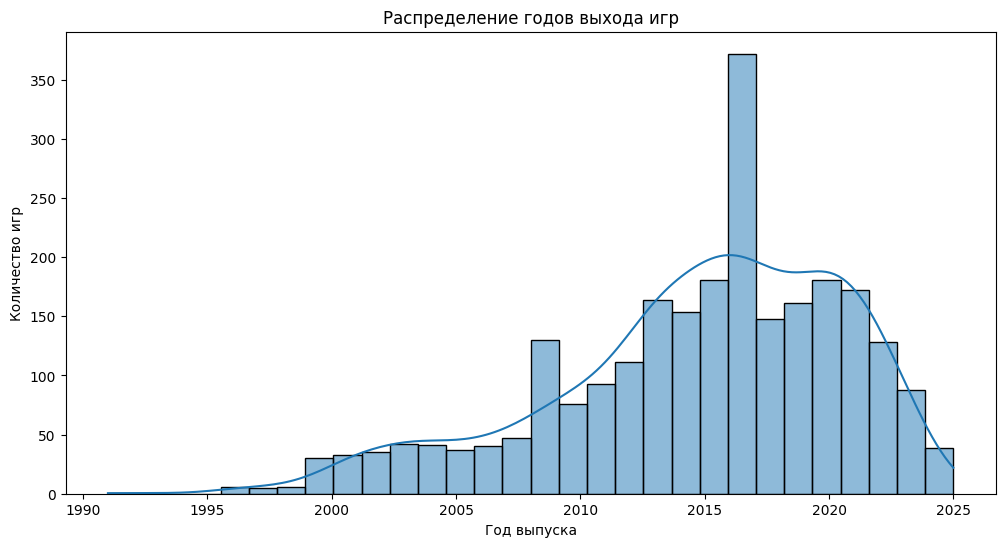

In [ ]:
# –ê–Ω–∞–ª–∏–∑ –¥–∞—Ç –≤—ã—Ö–æ–¥–∞ –∏–≥—Ä
df_ars['release_year'] = pd.to_datetime(df_ars['released']).dt.year

plt.figure(figsize=(12, 6))
sns.histplot(df_ars['release_year'].dropna(), bins=30, kde=True)
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≥–æ–¥–æ–≤ –≤—ã—Ö–æ–¥–∞ –∏–≥—Ä")
plt.xlabel("–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä")
plt.show()

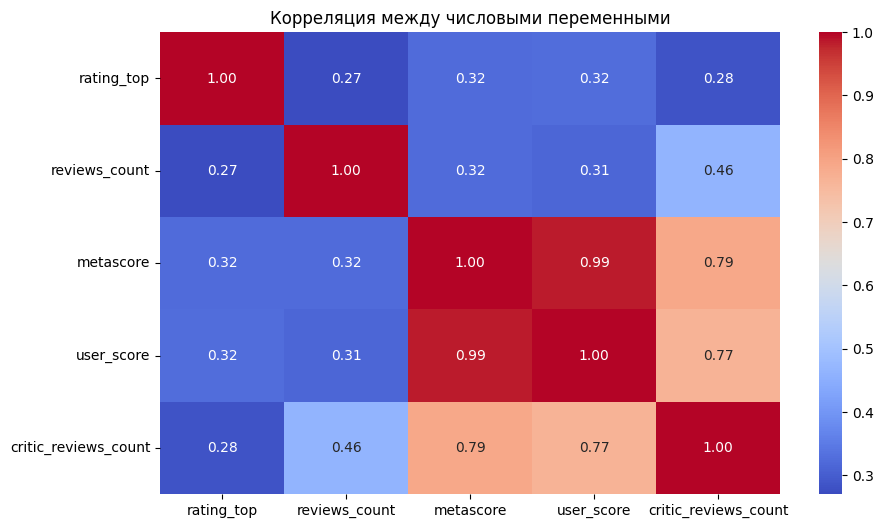

In [ ]:

numeric_columns = ['rating_top', 'reviews_count', 'metascore', 'user_score', 'critic_reviews_count']
correlation_matrix = df_ars[numeric_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("–ö–æ—Ä—Ä–µ–ª—è—Ü–∏—è –º–µ–∂–¥—É —á–∏—Å–ª–æ–≤—ã–º–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–º–∏")
plt.show()

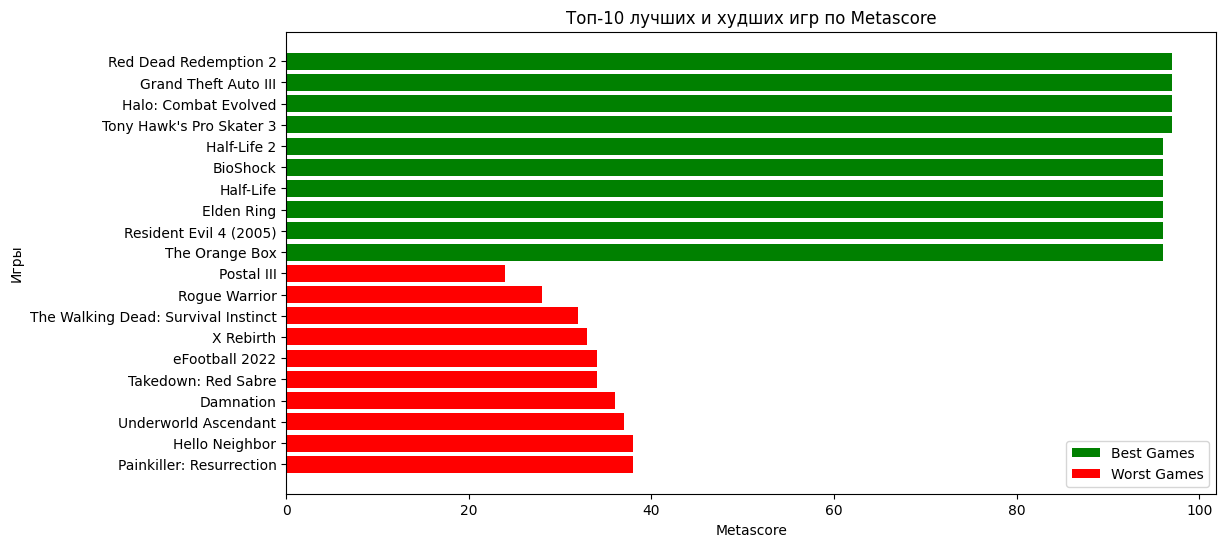

In [ ]:
# –û—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ –∏–≥—Ä—ã, —É –∫–æ—Ç–æ—Ä—ã—Ö Metascore –±–æ–ª—å—à–µ 0
df_filtered_metascore = df_ars[df_ars['metascore'] > 0]

# –¢–æ–ø-10 –ª—É—á—à–∏—Ö –∏–≥—Ä –ø–æ Metascore
top_10_best_filtered = df_filtered_metascore.nlargest(10, 'metascore')[['name', 'metascore', 'user_score', 'reviews_count']]

# –¢–æ–ø-10 —Ö—É–¥—à–∏—Ö –∏–≥—Ä –ø–æ Metascore
top_10_worst_filtered = df_filtered_metascore.nsmallest(10, 'metascore')[['name', 'metascore', 'user_score', 'reviews_count']]

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –æ–±–Ω–æ–≤–ª–µ–Ω–Ω–æ–≥–æ —Ä–µ–π—Ç–∏–Ω–≥–∞
plt.figure(figsize=(12, 6))

# –¢–æ–ø-10 –ª—É—á—à–∏—Ö
plt.barh(top_10_best_filtered['name'], top_10_best_filtered['metascore'], color='green', label='Best Games')
# –¢–æ–ø-10 —Ö—É–¥—à–∏—Ö
plt.barh(top_10_worst_filtered['name'], top_10_worst_filtered['metascore'], color='red', label='Worst Games')

plt.xlabel("Metascore")
plt.ylabel("–ò–≥—Ä—ã")
plt.title("–¢–æ–ø-10 –ª—É—á—à–∏—Ö –∏ —Ö—É–¥—à–∏—Ö –∏–≥—Ä –ø–æ Metascore")
plt.legend()
plt.gca().invert_yaxis()
plt.show()


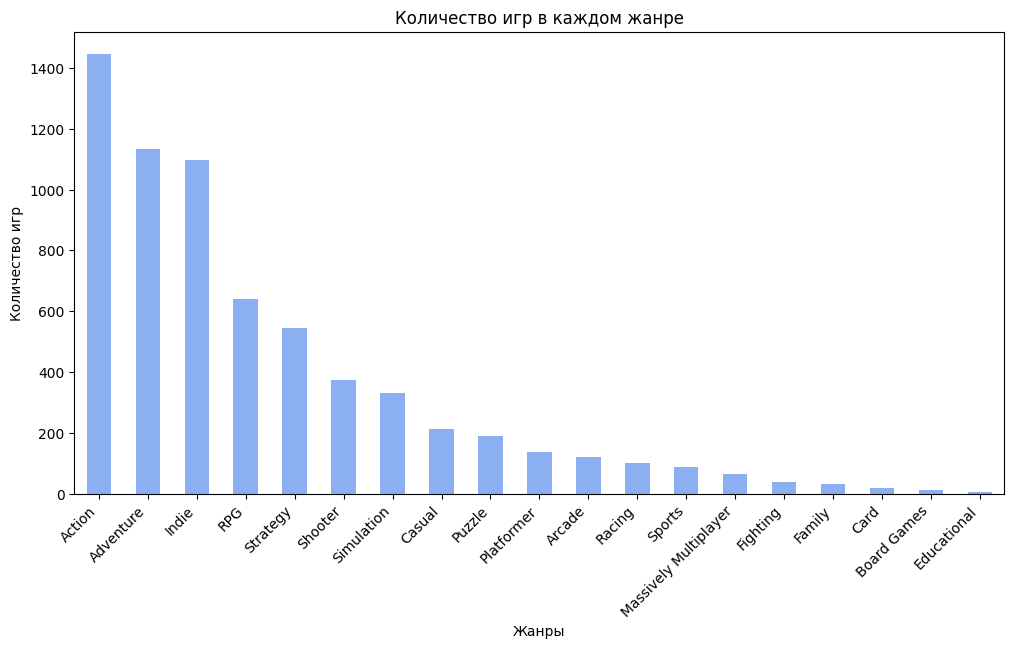

In [ ]:


    # –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –≤ –∫–∞–∂–¥–æ–º –∂–∞–Ω—Ä–µ
    genre_counts = df_genres_count['genres'].value_counts()

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º
    plt.figure(figsize=(12, 6))
    genre_counts.plot(kind='bar', color="cornflowerblue", alpha=0.75)
    plt.title("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –≤ –∫–∞–∂–¥–æ–º –∂–∞–Ω—Ä–µ")
    plt.xlabel("–ñ–∞–Ω—Ä—ã")
    plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä")
    plt.xticks(rotation=45, ha="right")
    plt.show()

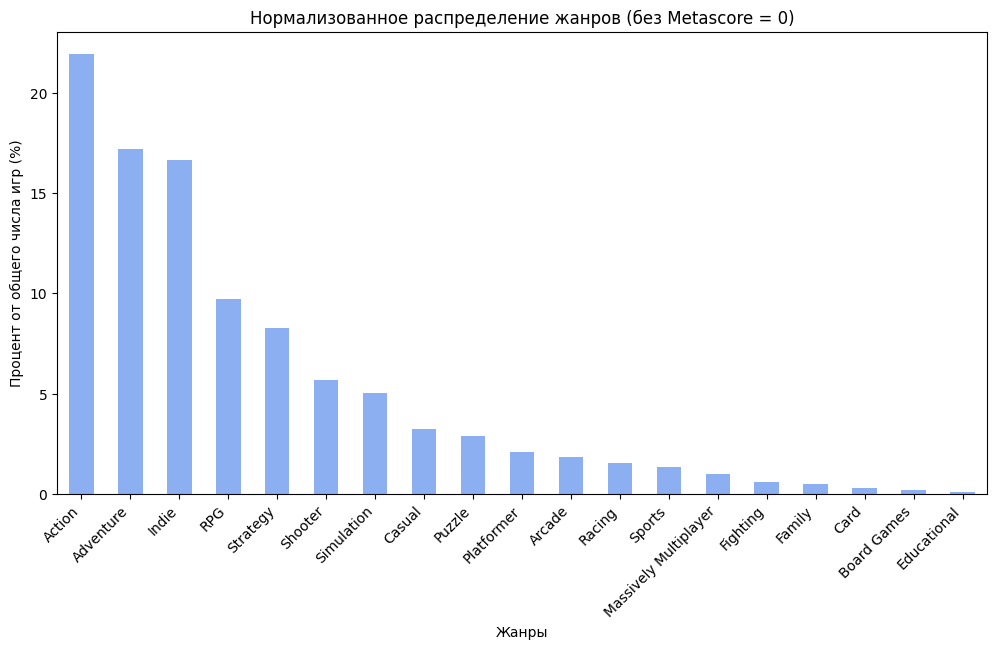

In [ ]:
# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –µ—Å—Ç—å –ª–∏ –∫–æ–ª–æ–Ω–∫–∞ 'genres' –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
if 'genres' in df_ars.columns:
    # –ò—Å–∫–ª—é—á–∞–µ–º –∏–≥—Ä—ã —Å Metascore = 0
    df_filtered = df_ars[df_ars['metascore'] > 0]

    # –†–∞–∑–¥–µ–ª—è–µ–º –∂–∞–Ω—Ä—ã (–µ—Å–ª–∏ —É –æ–¥–Ω–æ–π –∏–≥—Ä—ã –Ω–µ—Å–∫–æ–ª—å–∫–æ –∂–∞–Ω—Ä–æ–≤, —Ä–∞–∑–¥–µ–ª—è–µ–º –∏—Ö)
    df_genres_count = df_filtered[['genres']].dropna()
    df_genres_count = df_genres_count.assign(genres=df_genres_count['genres'].str.split(', ')).explode('genres')

    # –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –≤ –∫–∞–∂–¥–æ–º –∂–∞–Ω—Ä–µ
    genre_counts = df_genres_count['genres'].value_counts()

    # –ù–æ—Ä–º–∞–ª–∏–∑—É–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –≤ –∫–∞–∂–¥–æ–º –∂–∞–Ω—Ä–µ (–ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ)
    genre_counts_normalized = genre_counts / genre_counts.sum() * 100

    # –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –Ω–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–≥–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∂–∞–Ω—Ä–æ–≤
    plt.figure(figsize=(12, 6))
    genre_counts_normalized.plot(kind='bar', color="cornflowerblue", alpha=0.75)
    plt.title("–ù–æ—Ä–º–∞–ª–∏–∑–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∂–∞–Ω—Ä–æ–≤ (–±–µ–∑ Metascore = 0)")
    plt.xlabel("–ñ–∞–Ω—Ä—ã")
    plt.ylabel("–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ç –æ–±—â–µ–≥–æ —á–∏—Å–ª–∞ –∏–≥—Ä (%)")
    plt.xticks(rotation=45, ha="right")
    plt.show()

    # –ü–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞–µ–º —Å—Ä–µ–¥–Ω–∏–µ –æ—Ü–µ–Ω–∫–∏ —Å —É—á–µ—Ç–æ–º –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏–∏
    df_genres_normalized = df_filtered[['genres', 'metascore', 'user_score']].dropna()
    df_genres_normalized = df_genres_normalized.assign(genres=df_genres_normalized['genres'].str.split(', ')).explode('genres')
    df_genres_normalized['user_score'] = df_genres_normalized['user_score'] * 10
    # –£—Å—Ä–µ–¥–Ω—è–µ–º –æ—Ü–µ–Ω–∫–∏
    genre_scores_normalized = df_genres_normalized.groupby('genres').agg({'metascore': 'mean', 'user_score': 'mean'}).sort_values('metascore', ascending=False)

<Figure size 1500x700 with 0 Axes>

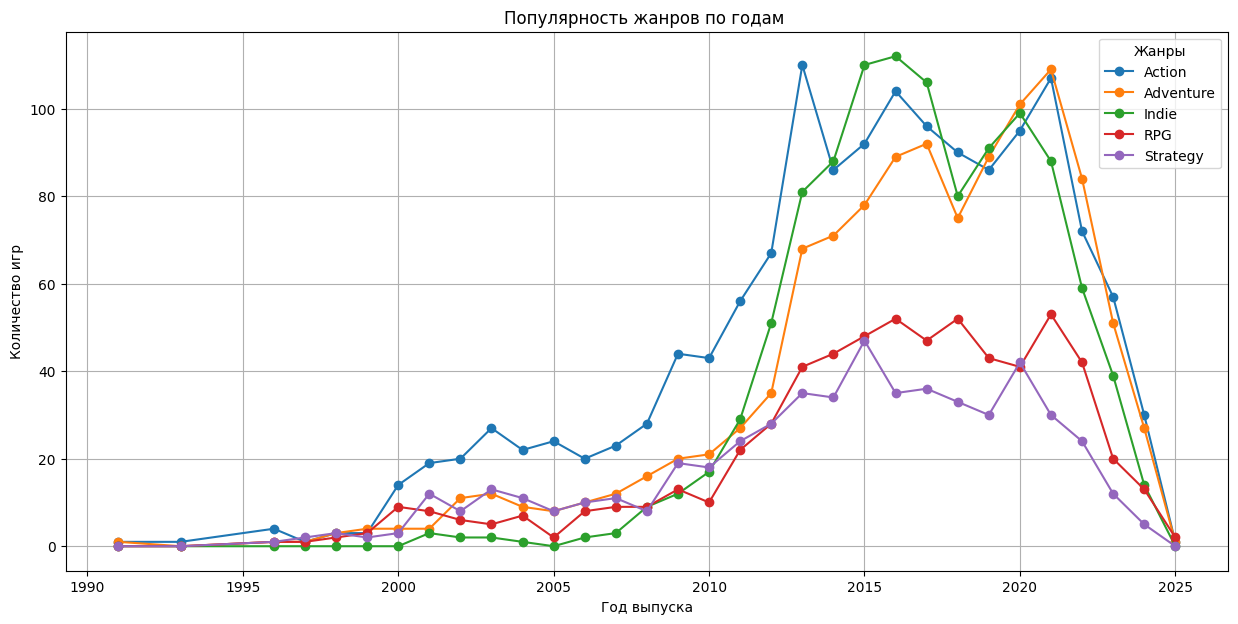

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞—Ç—ã –≤—ã—Ö–æ–¥–∞ –≤ —Ñ–æ—Ä–º–∞—Ç datetime
df_ars['released'] = pd.to_datetime(df_ars['released'], format="%d.%m.%Y", errors='coerce')
df_ars['release_year'] = df_ars['released'].dt.year

# –£–º–Ω–æ–∂–∞–µ–º User Score –Ω–∞ 10 –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—è —Å Metascore
df_ars['user_score'] = df_ars['user_score'] * 10

# –ò—Å–∫–ª—é—á–µ–Ω–∏–µ –∏–≥—Ä —Å Metascore = 0
df_ars = df_ars[df_ars['metascore'] > 0].copy()

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∂–∞–Ω—Ä–æ–≤ –≤ —Å–ø–∏—Å–∫–∏
df_ars['genres'] = df_ars['genres'].astype(str).apply(lambda x: x.split(', ') if x != 'nan' else [])

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –∂–∞–Ω—Ä–æ–≤ —Å –º–µ–Ω–µ–µ —á–µ–º 100 –∏–≥—Ä–∞–º–∏
genre_counts = df_ars.explode('genres')['genres'].value_counts()
valid_genres = genre_counts[genre_counts >= 50].index

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞—Ç–∞—Å–µ—Ç–∞ –ø–æ –∂–∞–Ω—Ä–∞–º —Å –¥–æ—Å—Ç–∞—Ç–æ—á–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∏–≥—Ä
filtered_genre_trends = df_ars.explode('genres')
filtered_genre_trends = filtered_genre_trends[filtered_genre_trends['genres'].isin(valid_genres)]

# –ì—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∏–≥—Ä –ø–æ –≥–æ–¥–∞–º –∏ –∂–∞–Ω—Ä–∞–º
genre_trends_filtered = filtered_genre_trends.groupby(['release_year', 'genres']).size().unstack().fillna(0)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∏–Ω–∞–º–∏–∫–∏ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∂–∞–Ω—Ä–æ–≤
plt.figure(figsize=(15, 7))
top_genres_filtered = genre_trends_filtered.sum().sort_values(ascending=False).head(5).index  # –¢–æ–ø-5 –∂–∞–Ω—Ä–æ–≤
genre_trends_filtered[top_genres_filtered].plot(kind="line", marker="o", figsize=(15, 7))
plt.title("–ü–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∂–∞–Ω—Ä–æ–≤ –ø–æ –≥–æ–¥–∞–º ")
plt.xlabel("–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä")
plt.legend(title="–ñ–∞–Ω—Ä—ã")
plt.grid(True)
plt.show()



–í—ã–≤–æ–¥:
–ñ–∞–Ω—Ä—ã RPG –∏ Adventure ‚Äì –≤—ã–≥–æ–¥–Ω—ã–µ –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∏—è –¥–ª—è –∏–Ω–≤–µ—Å—Ç–∏—Ü–∏–π, —Ç–∞–∫ –∫–∞–∫ –≤—ã—Å–æ–∫–æ –æ—Ü–µ–Ω–∏–≤–∞—é—Ç—Å—è –∏ –∫—Ä–∏—Ç–∏–∫–∞–º–∏, –∏ –∏–≥—Ä–æ–∫–∞–º–∏.
Strategy, –Ω–µ—Å–º–æ—Ç—Ä—è –Ω–∞ –ø–∞–¥–µ–Ω–∏–µ, —É–¥–µ—Ä–∂–∏–≤–∞–µ—Ç –≤—ã—Å–æ–∫–∏–π –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π —Ä–µ–π—Ç–∏–Ω–≥, —á—Ç–æ –º–æ–∂–µ—Ç –æ–∑–Ω–∞—á–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Å–æ–∑–¥–∞–Ω–∏—è –Ω–∏—à–µ–≤—ã—Ö –ø—Ä–æ–µ–∫—Ç–æ–≤.

In [ ]:
# –ò—Å–∫–ª—é—á–∞–µ–º –∏–≥—Ä—ã —Å metascore = 0 –∏ –ø—Ä–∏–≤–æ–¥–∏–º user_score –∫ 100-–±–∞–ª—å–Ω–æ–π —à–∫–∞–ª–µ
df_filtered = df_ars[(df_ars['metascore'] > 0) & (df_ars['user_score'] > 0)].copy()
df_filtered['user_score'] = df_filtered['user_score'] * 10

# –ü–µ—Ä–µ—Å—á–∏—Ç—ã–≤–∞–µ–º —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º–∏ –∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏
df_filtered['score_diff'] = df_filtered['user_score'] - df_filtered['metascore']

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∏–≥—Ä—ã —Å —Å–∞–º—ã–º –±–æ–ª—å—à–∏–º —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ–º
top_discrepancies = df_filtered[['name', 'metascore', 'user_score', 'score_diff']]\
    .sort_values(by='score_diff', ascending=False)


top_discrepancies

name  metascore  user_score  score_diff
3918          Hard Truck: Apocalypse       45.0        84.0        39.0
9696                Starpoint Gemini       46.0        84.0        38.0
7823                    SuperPower 2       51.0        87.0        36.0
694                   Cortex Command       44.0        73.0        29.0
5504                    Original War       61.0        88.0        27.0
...                              ...        ...         ...         ...
4029  Diaries of a Spaceport Janitor       69.0         9.0       -60.0
3203                        NBA 2K18       80.0        19.0       -61.0
2106                       Diablo IV       86.0        25.0       -61.0
1114                     Overwatch 2       79.0        18.0       -61.0
1674                         FIFA 21       72.0        10.0       -62.0

[2506 rows x 4 columns]

<ipython-input-702-7140e419ebff>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_filtered['release_year'] = pd.to_datetime(df_filtered['released'], errors='coerce').dt.year


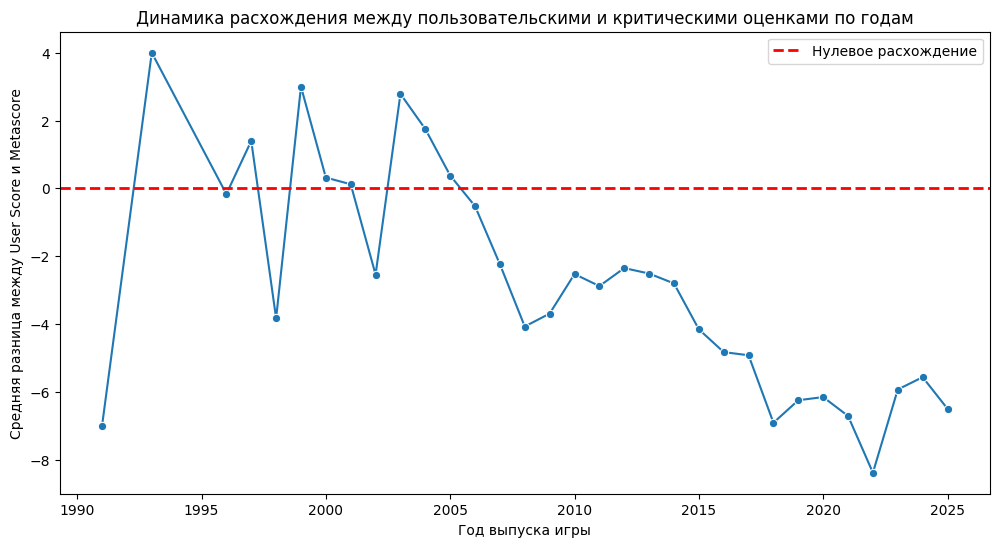

In [ ]:
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±–µ—Ü 'released' –≤ —Ñ–æ—Ä–º–∞—Ç –¥–∞—Ç—ã –∏ –≤—ã–¥–µ–ª–∏–º –≥–æ–¥ –≤—ã–ø—É—Å–∫–∞
df_filtered['release_year'] = pd.to_datetime(df_filtered['released'], errors='coerce').dt.year

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –≥–æ–¥—É –≤—ã–ø—É—Å–∫–∞ –∏ –≤—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ
yearly_diff = df_filtered.groupby('release_year')['score_diff'].mean()

# –°—Ç—Ä–æ–∏–º –≥—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è –ø–æ –≥–æ–¥–∞–º
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_diff.index, y=yearly_diff.values, marker="o", linestyle="-")
plt.axhline(0, color='red', linestyle='dashed', linewidth=2, label="–ù—É–ª–µ–≤–æ–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–µ")
plt.xlabel('–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞ –∏–≥—Ä—ã')
plt.ylabel('–°—Ä–µ–¥–Ω—è—è —Ä–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É User Score –∏ Metascore')
plt.title('–î–∏–Ω–∞–º–∏–∫–∞ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è –º–µ–∂–¥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º–∏ –∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏ –ø–æ –≥–æ–¥–∞–º')
plt.legend()
plt.show()


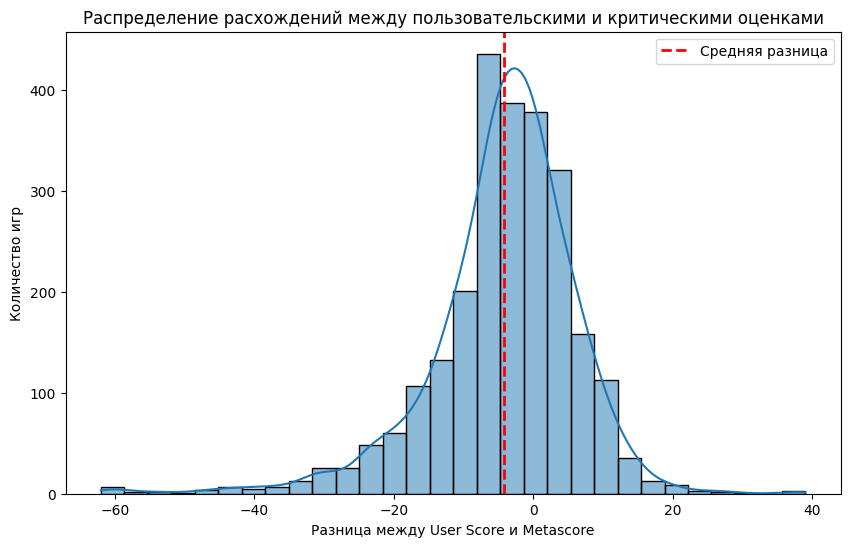

In [ ]:
# –°—Ç—Ä–æ–∏–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞–∑–Ω–∏—Ü—ã –º–µ–∂–¥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º–∏ –∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['score_diff'], bins=30, kde=True)
plt.axvline(df_filtered['score_diff'].mean(), color='red', linestyle='dashed', linewidth=2, label="–°—Ä–µ–¥–Ω—è—è —Ä–∞–∑–Ω–∏—Ü–∞")
plt.xlabel('–†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É User Score –∏ Metascore')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏–π –º–µ–∂–¥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–º–∏ –∏ –∫—Ä–∏—Ç–∏—á–µ—Å–∫–∏–º–∏ –æ—Ü–µ–Ω–∫–∞–º–∏')
plt.legend()
plt.show()


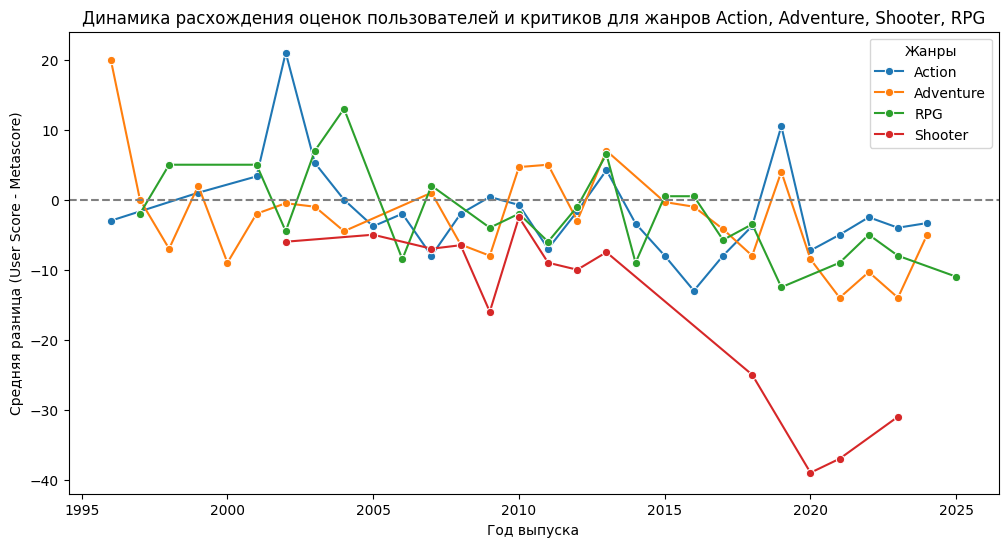

In [ ]:
selected_genres = ["Action", "Adventure", "Shooter", "RPG"]
df_selected_genres = df_filtered[df_filtered['genres'].isin(selected_genres)]

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –≥–æ–¥–∞–º –∏ –∂–∞–Ω—Ä–∞–º, —É—Å—Ä–µ–¥–Ω—è—è —Ä–∞–∑–Ω–∏—Ü—É –æ—Ü–µ–Ω–æ–∫
genre_score_diff_trend = df_selected_genres.groupby(['release_year', 'genres'], as_index=False)['score_diff'].mean()

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∏—Å–ø—Ä–∞–≤–ª–µ–Ω–Ω—É—é –¥–∏–Ω–∞–º–∏–∫—É —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è –æ—Ü–µ–Ω–æ–∫ –ø–æ –≥–æ–¥–∞–º
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_score_diff_trend, x='release_year', y='score_diff', hue='genres', marker='o')
plt.axhline(0, color='gray', linestyle='dashed')  # –õ–∏–Ω–∏—è –Ω—É–ª–µ–≤–æ–≥–æ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è
plt.xlabel("–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞")
plt.ylabel("–°—Ä–µ–¥–Ω—è—è —Ä–∞–∑–Ω–∏—Ü–∞ (User Score - Metascore)")
plt.title("–î–∏–Ω–∞–º–∏–∫–∞ —Ä–∞—Å—Ö–æ–∂–¥–µ–Ω–∏—è –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –∫—Ä–∏—Ç–∏–∫–æ–≤ –¥–ª—è –∂–∞–Ω—Ä–æ–≤ Action, Adventure, Shooter, RPG")
plt.legend(title="–ñ–∞–Ω—Ä—ã")
plt.show()

In [ ]:
# –†–∞–∑–¥–µ–ª–∏–º –º–∞–≥–∞–∑–∏–Ω—ã, —Ä–∞–∑–≤–µ—Ä–Ω—É–≤ –∏—Ö –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏
df_exploded_stores = df_filtered.dropna(subset=['stores']).copy()
df_exploded_stores['stores'] = df_exploded_stores['stores'].str.split(', ')
df_exploded_stores = df_exploded_stores.explode('stores')

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –º–∞–≥–∞–∑–∏–Ω–∞–º –∏ –≤—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–∏–π metascore –∏ user_score
store_ratings = df_exploded_stores.groupby('stores')[['metascore', 'user_score']].mean().sort_values(by='metascore', ascending=False)

<ipython-input-784-0b258af166df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_counts.head(10).index, y=store_counts.head(10).values, palette="Blues_r")


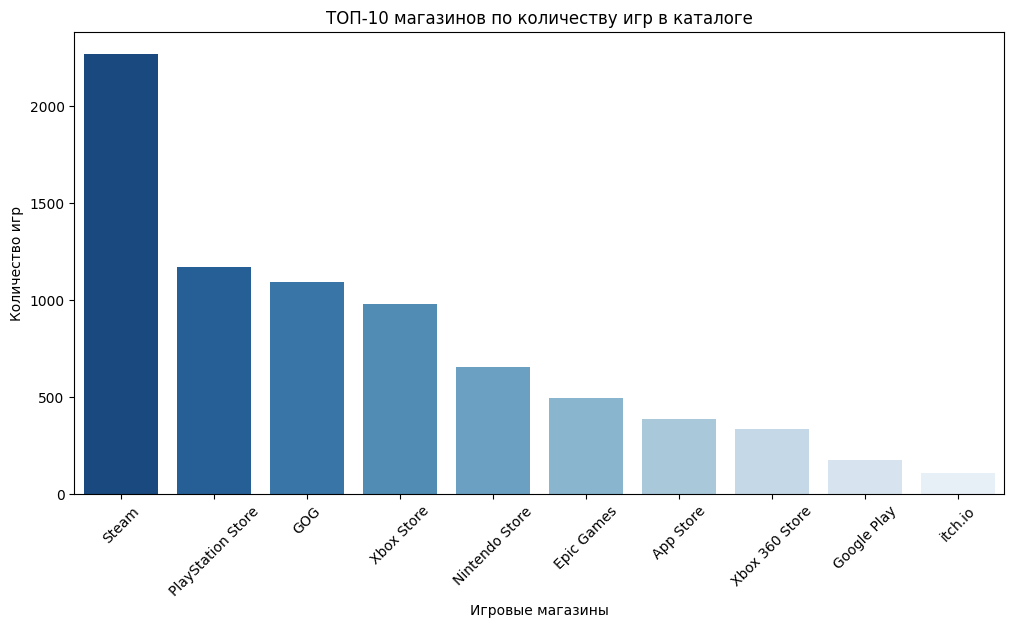

In [ ]:
# –ü–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –≤ –∫–∞–∂–¥–æ–º –º–∞–≥–∞–∑–∏–Ω–µ
store_counts = df_exploded_stores['stores'].value_counts()

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ–ø-10 –º–∞–≥–∞–∑–∏–Ω–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∏–≥—Ä
plt.figure(figsize=(12, 6))
sns.barplot(x=store_counts.head(10).index, y=store_counts.head(10).values, palette="Blues_r")
plt.xticks(rotation=45)
plt.xlabel("–ò–≥—Ä–æ–≤—ã–µ –º–∞–≥–∞–∑–∏–Ω—ã")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä")
plt.title("–¢–û–ü-10 –º–∞–≥–∞–∑–∏–Ω–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∏–≥—Ä –≤ –∫–∞—Ç–∞–ª–æ–≥–µ")
plt.show()


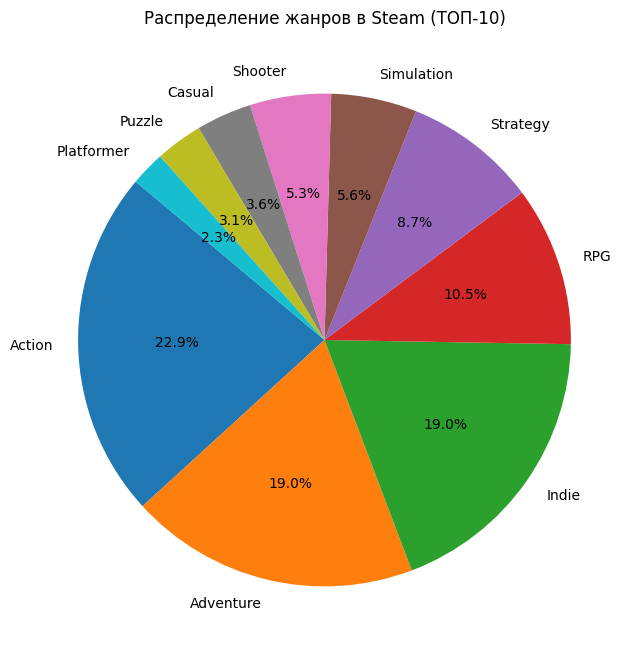

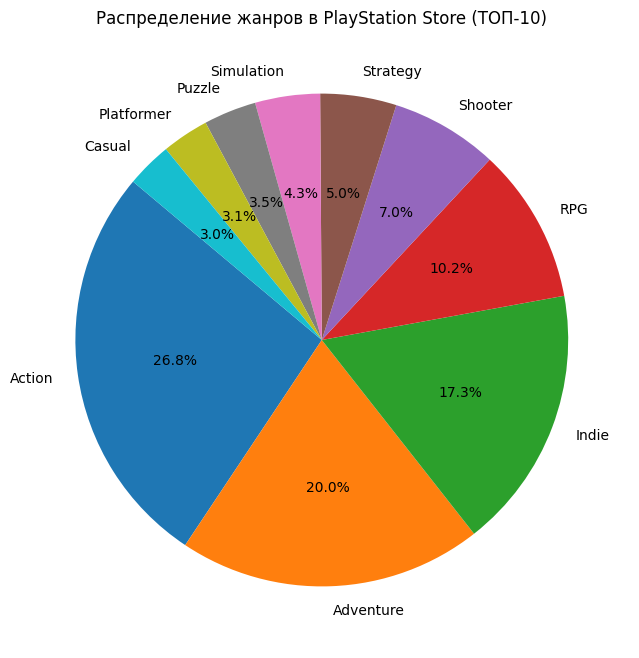

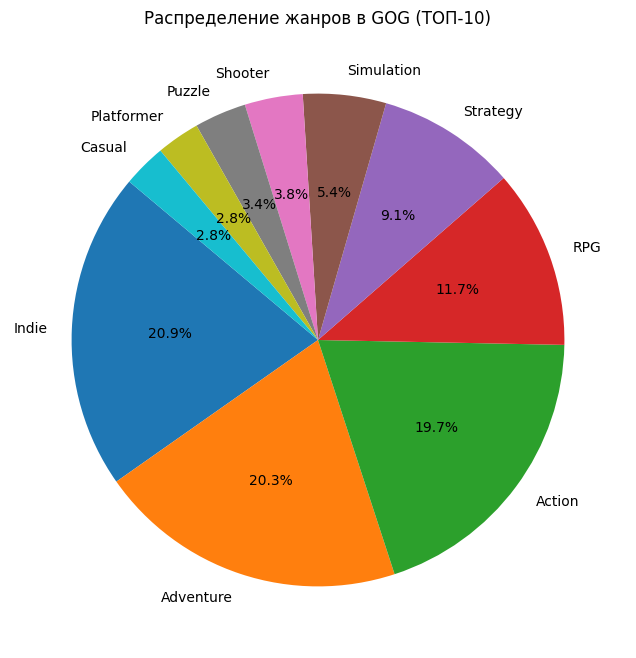

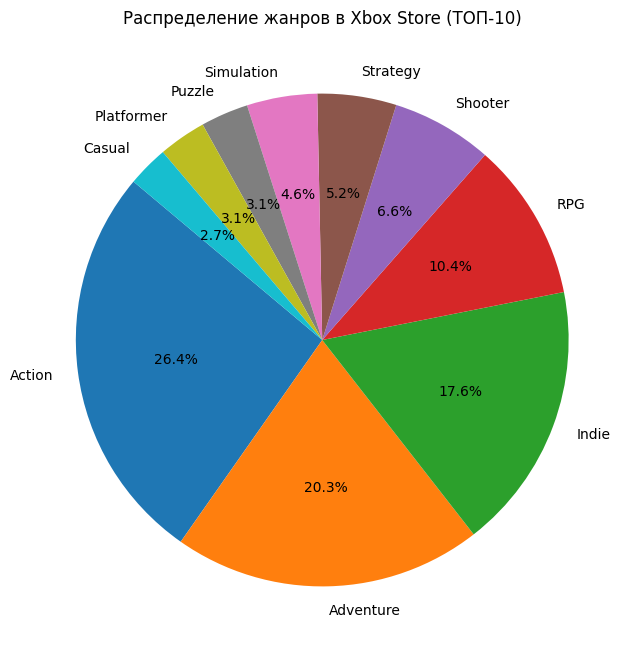

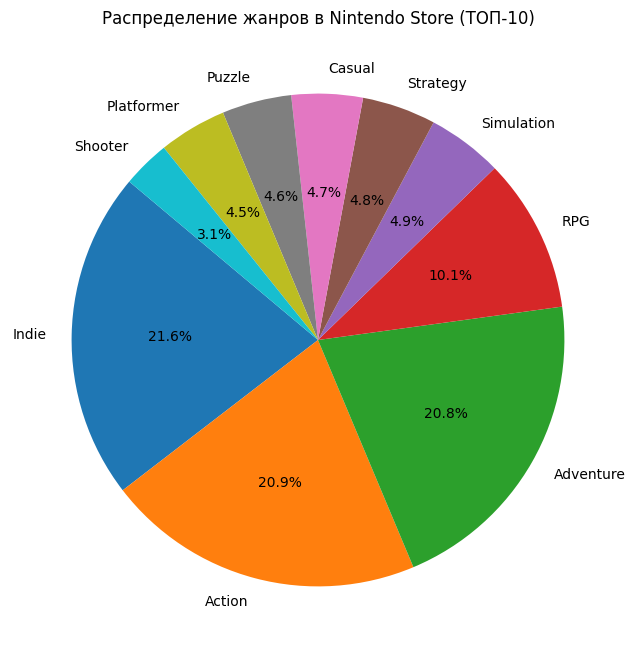

In [ ]:
# –†–∞–∑–¥–µ–ª–∏–º –∂–∞–Ω—Ä—ã, —Ä–∞–∑–≤–µ—Ä–Ω—É–≤ –∏—Ö –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏
df_exploded_stores_genres = df_exploded_stores.dropna(subset=['genres']).copy()
df_exploded_stores_genres['genres'] = df_exploded_stores_genres['genres'].str.split(', ')
df_exploded_stores_genres = df_exploded_stores_genres.explode('genres')

# –í—ã–±–µ—Ä–µ–º –¢–û–ü-5 –º–∞–≥–∞–∑–∏–Ω–æ–≤ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∏–≥—Ä
top_5_stores = store_counts.head(5).index

# –ü–æ—Å—Ç—Ä–æ–∏–º –∫—Ä—É–≥–æ–≤—ã–µ –¥–∏–∞–≥—Ä–∞–º–º—ã –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –º–∞–≥–∞–∑–∏–Ω–∞
for store in top_5_stores:
    store_genre_counts = df_exploded_stores_genres[df_exploded_stores_genres['stores'] == store]['genres'].value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(store_genre_counts[:10], labels=store_genre_counts.index[:10], autopct='%1.1f%%', startangle=140)
    plt.title(f'–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∂–∞–Ω—Ä–æ–≤ –≤ {store} (–¢–û–ü-10)')
    plt.show()


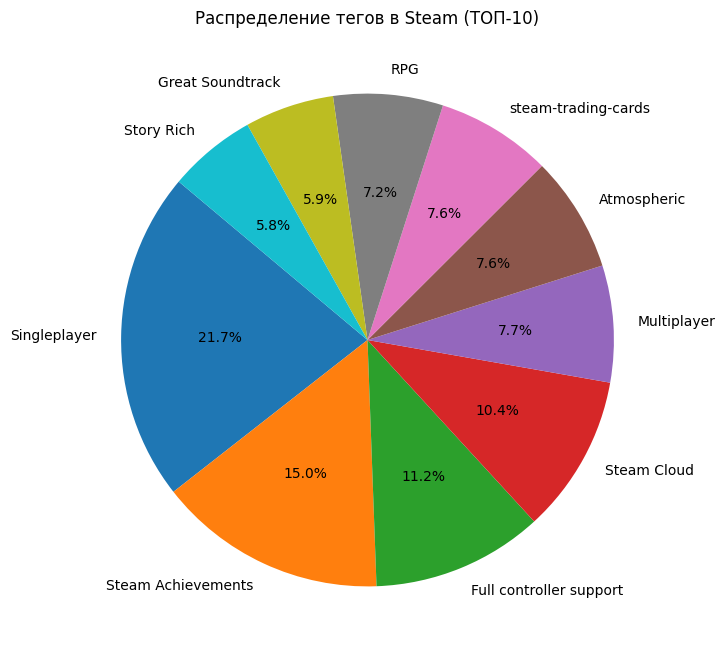

In [ ]:
# –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ –¥–ª—è –∏–≥—Ä, –¥–æ—Å—Ç—É–ø–Ω—ã—Ö –≤ Steam
df_steam = df_exploded_stores_genres[df_exploded_stores_genres['stores'] == 'Steam']

# –†–∞–∑–¥–µ–ª–∏–º —Ç–µ–≥–∏, —Ä–∞–∑–≤–µ—Ä–Ω—É–≤ –∏—Ö –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏
df_steam_tags = df_steam.dropna(subset=['tags']).copy()
df_steam_tags['tags'] = df_steam_tags['tags'].str.split(', ')
df_steam_tags = df_steam_tags.explode('tags')

# –ü–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –ø–æ —Ç–µ–≥–∞–º –≤ Steam
steam_tag_counts = df_steam_tags['tags'].value_counts()

# –ü–æ—Å—Ç—Ä–æ–∏–º –∫—Ä—É–≥–æ–≤—É—é –¥–∏–∞–≥—Ä–∞–º–º—É –¥–ª—è –¢–û–ü-10 —Ç–µ–≥–æ–≤
plt.figure(figsize=(8, 8))
plt.pie(steam_tag_counts[:10], labels=steam_tag_counts.index[:10], autopct='%1.1f%%', startangle=140)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ç–µ–≥–æ–≤ –≤ Steam (–¢–û–ü-10)')
plt.show()


<ipython-input-762-e2b79d083275>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_tags_per_genre = genre_tag_counts_selected.groupby("genres").apply(lambda x: x.nlargest(15, 'count')).reset_index(drop=True)


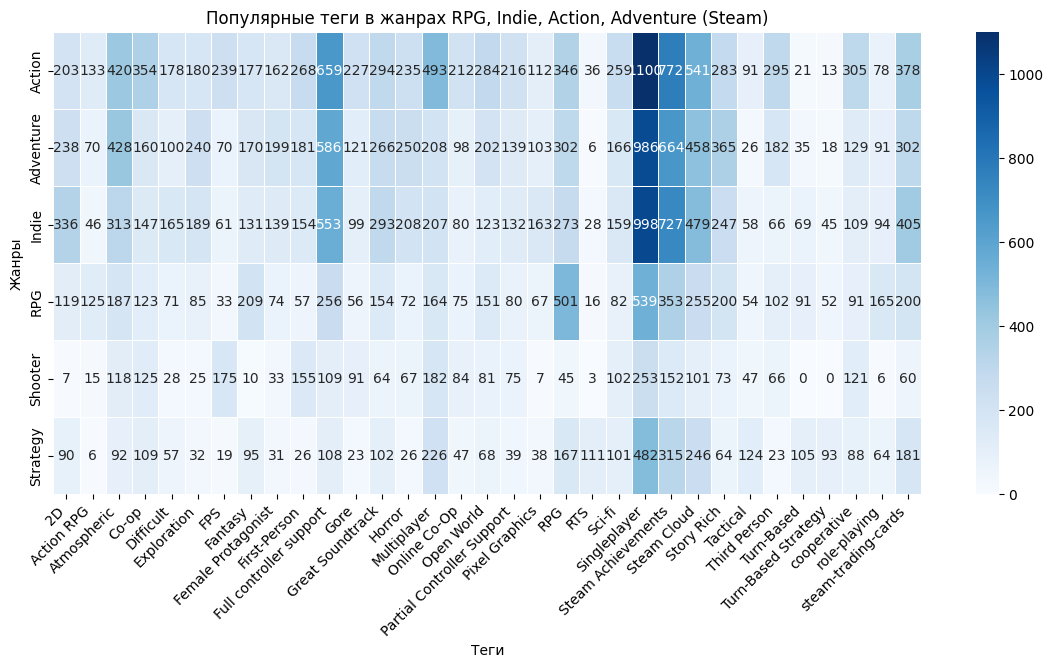

In [ ]:
# –í—ã–±–∏—Ä–∞–µ–º –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∏–µ –Ω–∞—Å –∂–∞–Ω—Ä—ã
selected_genres = ["RPG", "Indie", "Action", "Adventure","Shooter","Strategy"]
df_selected_genres = df_steam_tags[df_steam_tags['genres'].isin(selected_genres)]

# –ü–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–ø–æ–º–∏–Ω–∞–Ω–∏–π —Ç–µ–≥–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∂–∞–Ω—Ä–∞
genre_tag_counts_selected = df_selected_genres.groupby(['genres', 'tags']).size().reset_index(name='count')

# –û–≥—Ä–∞–Ω–∏—á–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç–µ–≥–æ–≤ –¥–ª—è —É–¥–æ–±–æ—á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
top_tags_per_genre = genre_tag_counts_selected.groupby("genres").apply(lambda x: x.nlargest(15, 'count')).reset_index(drop=True)

# –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ —Ç–æ–ø-15 —Ç–µ–≥–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∂–∞–Ω—Ä–µ
filtered_tags = genre_tag_counts_selected[genre_tag_counts_selected["tags"].isin(top_tags_per_genre["tags"].unique())]

# –ü–µ—Ä–µ—Å—Ç—Ä–∞–∏–≤–∞–µ–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
pivot_table_selected = filtered_tags.pivot(index="genres", columns="tags", values="count").fillna(0)

# –£–ª—É—á—à–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ —Ç–µ–ø–ª–æ–≤–æ–π –∫–∞—Ä—Ç—ã
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table_selected, cmap="Blues", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("–¢–µ–≥–∏")
plt.ylabel("–ñ–∞–Ω—Ä—ã")
plt.title("–ü–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ç–µ–≥–∏ –≤ –∂–∞–Ω—Ä–∞—Ö RPG, Indie, Action, Adventure (Steam)")
plt.xticks(rotation=45, ha="right")
plt.show()


<ipython-input-763-52efc1874d5e>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_per_tag = tag_genre_counts_selected.groupby("tags").apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


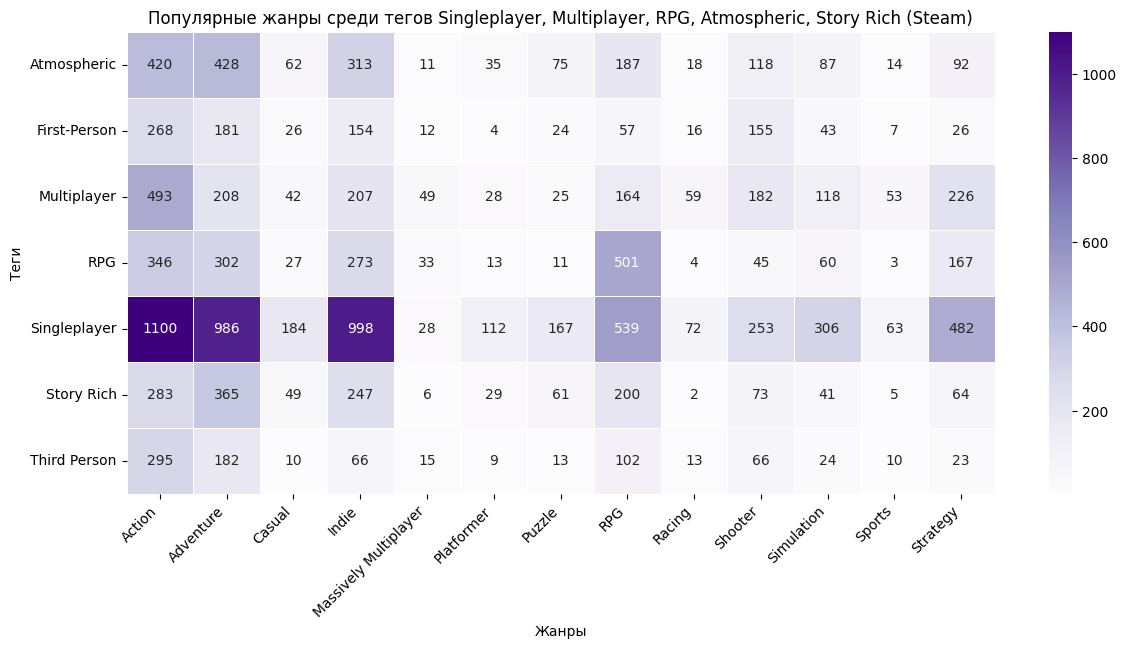

In [ ]:
# –í—ã–±–∏—Ä–∞–µ–º –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∏–µ –Ω–∞—Å —Ç–µ–≥–∏
selected_tags = ["Singleplayer", "Multiplayer", "RPG", "Atmospheric", "Story Rich","First-Person","Third Person"]
df_selected_tags = df_steam_tags[df_steam_tags['tags'].isin(selected_tags)]

# –ü–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–ø–æ–º–∏–Ω–∞–Ω–∏–π –∂–∞–Ω—Ä–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ç–µ–≥–∞
tag_genre_counts_selected = df_selected_tags.groupby(['tags', 'genres']).size().reset_index(name='count')

# –û–≥—Ä–∞–Ω–∏—á–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∂–∞–Ω—Ä–æ–≤ –¥–ª—è —É–¥–æ–±–æ—á–∏—Ç–∞–µ–º–æ—Å—Ç–∏
top_genres_per_tag = tag_genre_counts_selected.groupby("tags").apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# –§–∏–ª—å—Ç—Ä—É–µ–º –ø–æ —Ç–æ–ø-10 –∂–∞–Ω—Ä–æ–≤ –≤ –∫–∞–∂–¥–æ–º —Ç–µ–≥–µ
filtered_genres = tag_genre_counts_selected[tag_genre_counts_selected["genres"].isin(top_genres_per_tag["genres"].unique())]

# –ü–µ—Ä–µ—Å—Ç—Ä–∞–∏–≤–∞–µ–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
pivot_table_selected = filtered_genres.pivot(index="tags", columns="genres", values="count").fillna(0)

# –£–ª—É—á—à–µ–Ω–Ω—ã–π –≥—Ä–∞—Ñ–∏–∫ —Ç–µ–ø–ª–æ–≤–æ–π –∫–∞—Ä—Ç—ã
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table_selected, cmap="Purples", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("–ñ–∞–Ω—Ä—ã")
plt.ylabel("–¢–µ–≥–∏")
plt.title("–ü–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã —Å—Ä–µ–¥–∏ —Ç–µ–≥–æ–≤ Singleplayer, Multiplayer, RPG, Atmospheric, Story Rich (Steam)")
plt.xticks(rotation=45, ha="right")
plt.show()


<ipython-input-764-a49344298136>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=successful_tags_counts.head(15).values, y=successful_tags_counts.head(15).index, palette="Greens_r")


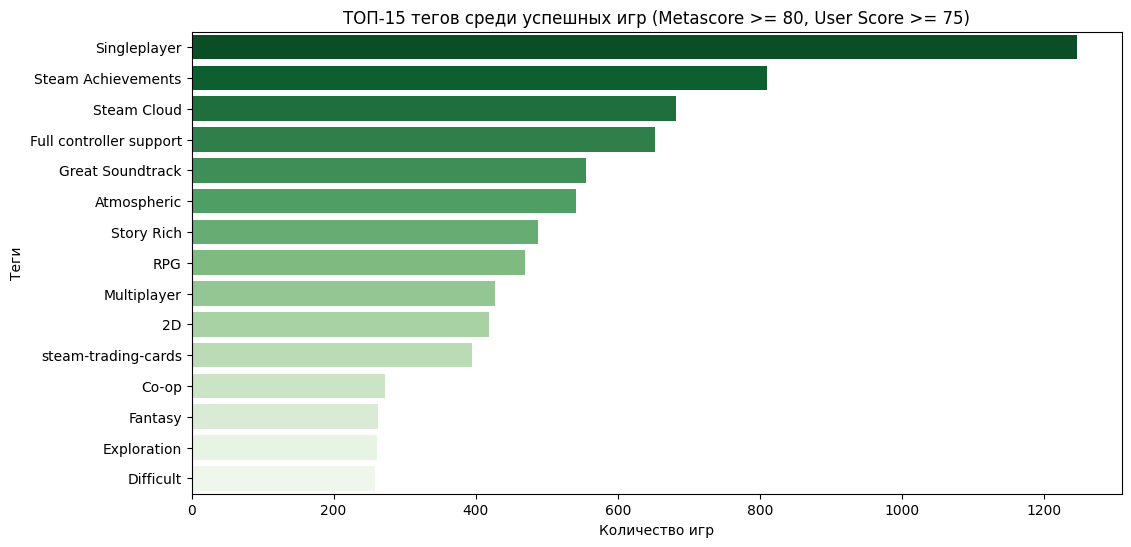

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª–∏–º —É—Å–ø–µ—à–Ω—ã–µ –∏–≥—Ä—ã (–Ω–∞–ø—Ä–∏–º–µ—Ä, Metascore >= 80 –∏ User Score >= 75)
successful_games = df_steam_tags[(df_steam_tags['metascore'] >= 80) & (df_steam_tags['user_score'] >= 75)]

# –ü–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–ø–æ–º–∏–Ω–∞–Ω–∏–π —Ç–µ–≥–æ–≤ —Å—Ä–µ–¥–∏ —É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä
successful_tags_counts = successful_games['tags'].value_counts()

# –û—Ç–æ–±—Ä–∞–∑–∏–º —Ç–æ–ø-15 —Ç–µ–≥–æ–≤ —Å—Ä–µ–¥–∏ —É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä
plt.figure(figsize=(12, 6))
sns.barplot(x=successful_tags_counts.head(15).values, y=successful_tags_counts.head(15).index, palette="Greens_r")
plt.xlabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä")
plt.ylabel("–¢–µ–≥–∏")
plt.title("–¢–û–ü-15 —Ç–µ–≥–æ–≤ —Å—Ä–µ–¥–∏ —É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä (Metascore >= 80, User Score >= 75)")
plt.show()



RPG: –¥–æ–º–∏–Ω–∏—Ä—É—é—Ç —Ç–µ–≥–∏, —Å–≤—è–∑–∞–Ω–Ω—ã–µ —Å —Ñ—ç–Ω—Ç–µ–∑–∏, –æ—Ç–∫—Ä—ã—Ç—ã–º –º–∏—Ä–æ–º, –ø—Ä–æ–∫–∞—á–∫–æ–π –ø–µ—Ä—Å–æ–Ω–∞–∂–∞.
Indie: —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è "–ø–∏–∫—Å–µ–ª—å-–∞—Ä—Ç", "2D", "—ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∞–ª—å–Ω—ã–µ –º–µ—Ö–∞–Ω–∏–∫–∏", —á—Ç–æ –ª–æ–≥–∏—á–Ω–æ –¥–ª—è –Ω–µ–∑–∞–≤–∏—Å–∏–º—ã—Ö —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–≤.
Action: –ø—Ä–µ–æ–±–ª–∞–¥–∞—é—Ç "—à—É—Ç–µ—Ä", "–¥–∏–Ω–∞–º–∏–∫–∞", "—Ä–µ–∞–ª–∏–∑–º", —á—Ç–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –∂–∞–Ω—Ä—É.
Adventure: –∑–¥–µ—Å—å –±–æ–ª—å—à–µ —Ç–µ–≥–æ–≤, —Å–≤—è–∑–∞–Ω–Ω—ã—Ö —Å —Å—é–∂–µ—Ç–Ω–æ–π –ª–∏–Ω–∏–µ–π, –∫–≤–µ—Å—Ç–∞–º–∏, –≥–æ–ª–æ–≤–æ–ª–æ–º–∫–∞–º–∏.
–≠—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞–µ—Ç, —á—Ç–æ –≤ –∫–∞–∂–¥–æ–º –∂–∞–Ω—Ä–µ –∏–≥—Ä–æ–∫–∏ –æ–∂–∏–¥–∞—é—Ç –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–Ω—ã–µ –º–µ—Ö–∞–Ω–∏–∫–∏, –∏ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–∞–º —Å—Ç–æ–∏—Ç —É—á–∏—Ç—ã–≤–∞—Ç—å –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ç–µ–≥–∏ –ø—Ä–∏ –ø–æ–∑–∏—Ü–∏–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–∏ –∏–≥—Ä—ã.

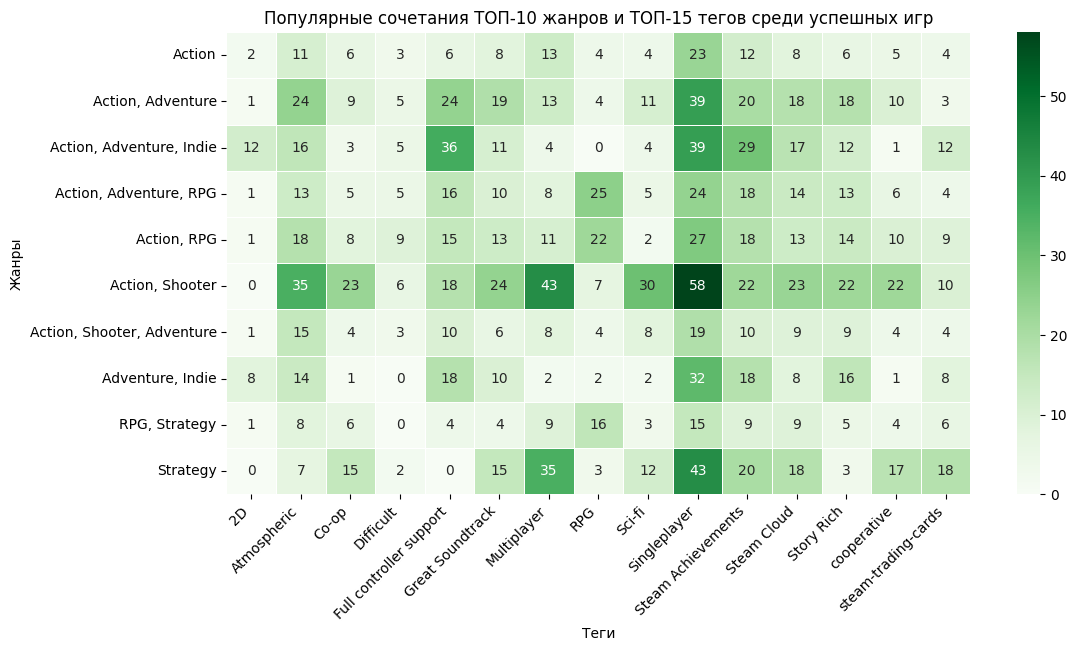

In [ ]:
# –ò—Å–∫–ª—é—á–µ–Ω–∏–µ –∏–≥—Ä —Å Metascore = 0
df_ars = df_ars[df_ars['metascore'] > 0].copy()

# –ü—Ä–∏–≤–æ–¥–∏–º user_score –∫ 100-–±–∞–ª–ª—å–Ω–æ–π —à–∫–∞–ª–µ
df_ars['user_score'] = df_ars['user_score'] * 10

# –†–∞–∑–¥–µ–ª—è–µ–º —Ç–µ–≥–∏, —Ä–∞–∑–≤–µ—Ä–Ω—É–≤ –∏—Ö –≤ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏
df_ars['tags'] = df_ars['tags'].fillna("").astype(str).str.split(', ')
df_steam_tags = df_ars.explode('tags')

# –§–∏–ª—å—Ç—Ä—É–µ–º —É—Å–ø–µ—à–Ω—ã–µ –∏–≥—Ä—ã (Metascore ‚â• 75 –∏ User Score ‚â• 70)
successful_games = df_steam_tags[(df_steam_tags['metascore'] >= 75) & (df_steam_tags['user_score'] >= 70)]

# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º —É—Å–ø–µ—à–Ω—ã–µ –∏–≥—Ä—ã –ø–æ –∂–∞–Ω—Ä–∞–º –∏ —Ç–µ–≥–∞–º, –ø–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–ø–æ–º–∏–Ω–∞–Ω–∏–π
successful_genre_tag_counts = successful_games.groupby(['genres', 'tags']).size().reset_index(name='count')

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–æ–ø-10 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∂–∞–Ω—Ä–æ–≤ —Å—Ä–µ–¥–∏ —É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä
top_10_successful_genres = successful_genre_tag_counts['genres'].value_counts().head(10).index

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–æ–ø-15 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ç–µ–≥–æ–≤ —Å—Ä–µ–¥–∏ —É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä
top_15_successful_tags = successful_genre_tag_counts['tags'].value_counts().head(15).index

# –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ –ø–æ —ç—Ç–∏–º –∂–∞–Ω—Ä–∞–º –∏ —Ç–µ–≥–∞–º
successful_genre_tag_filtered = successful_genre_tag_counts[
    (successful_genre_tag_counts['genres'].isin(top_10_successful_genres)) &
    (successful_genre_tag_counts['tags'].isin(top_15_successful_tags))
]

# –ü—Ä–æ–≤–µ—Ä—è–µ–º, –æ—Å—Ç–∞–ª–∏—Å—å –ª–∏ –¥–∞–Ω–Ω—ã–µ –ø–æ—Å–ª–µ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏
if not successful_genre_tag_filtered.empty:
    # –ü–µ—Ä–µ—Å—Ç—Ä–∞–∏–≤–∞–µ–º —Å–≤–æ–¥–Ω—É—é —Ç–∞–±–ª–∏—Ü—É
    pivot_successful_genres_tags = successful_genre_tag_filtered.pivot(index='genres', columns='tags', values='count').fillna(0)

    # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç—É
    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot_successful_genres_tags, cmap="Greens", linewidths=0.5, annot=True, fmt=".0f")
    plt.xlabel("–¢–µ–≥–∏")
    plt.ylabel("–ñ–∞–Ω—Ä—ã")
    plt.title("–ü–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–æ—á–µ—Ç–∞–Ω–∏—è –¢–û–ü-10 –∂–∞–Ω—Ä–æ–≤ –∏ –¢–û–ü-15 —Ç–µ–≥–æ–≤ —Å—Ä–µ–¥–∏ —É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä")
    plt.xticks(rotation=45, ha="right")
    plt.show()


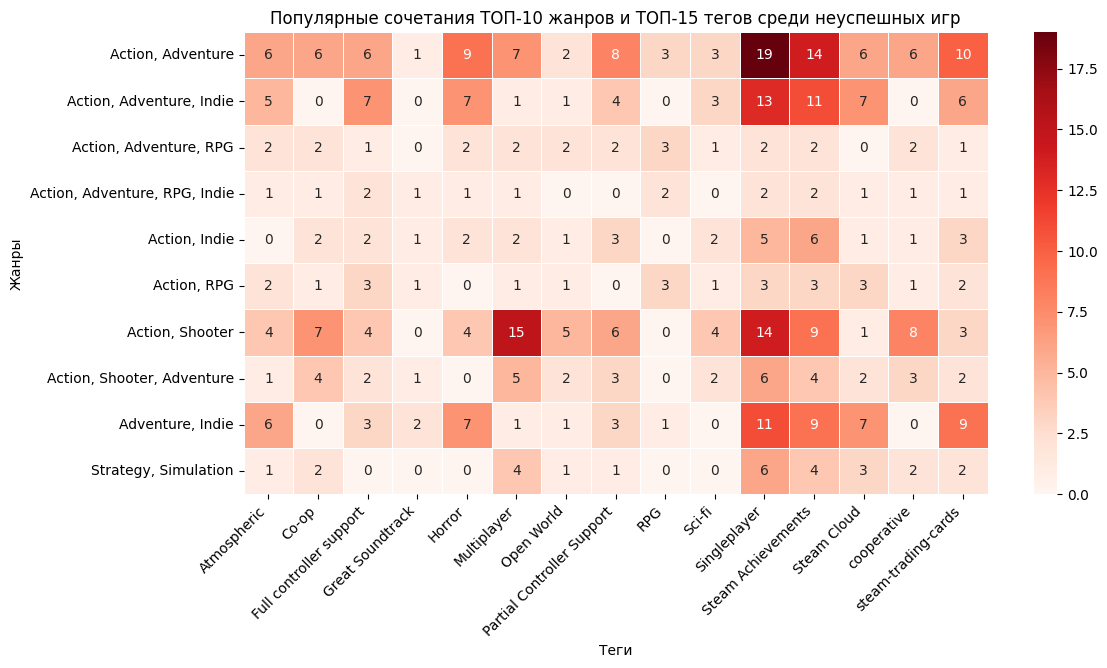

In [ ]:
unsuccessful_games = df_steam_tags[df_steam_tags['metascore'] < 60]


unsuccessful_genre_tag_counts = unsuccessful_games.groupby(['genres', 'tags']).size().reset_index(name='count')

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–æ–ø-10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö –∂–∞–Ω—Ä–æ–≤ —Å—Ä–µ–¥–∏ –Ω–µ—É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä
top_10_unsuccessful_genres = unsuccessful_genre_tag_counts['genres'].value_counts().head(10).index

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º —Ç–æ–ø-15 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö —Ç–µ–≥–æ–≤ —Å—Ä–µ–¥–∏ –Ω–µ—É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä
top_15_unsuccessful_tags = unsuccessful_genre_tag_counts['tags'].value_counts().head(15).index

# –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ —Ç–æ–ª—å–∫–æ –ø–æ —ç—Ç–∏–º –∂–∞–Ω—Ä–∞–º –∏ —Ç–µ–≥–∞–º
unsuccessful_genre_tag_filtered = unsuccessful_genre_tag_counts[
    (unsuccessful_genre_tag_counts['genres'].isin(top_10_unsuccessful_genres)) &
    (unsuccessful_genre_tag_counts['tags'].isin(top_15_unsuccessful_tags))
]


pivot_unsuccessful_genres_tags = unsuccessful_genre_tag_filtered.pivot(index='genres', columns='tags', values='count').fillna(0)

    # –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–µ–ø–ª–æ–≤—É—é –∫–∞—Ä—Ç
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_unsuccessful_genres_tags, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f")
plt.xlabel("–¢–µ–≥–∏")
plt.ylabel("–ñ–∞–Ω—Ä—ã")
plt.title("–ü–æ–ø—É–ª—è—Ä–Ω—ã–µ —Å–æ—á–µ—Ç–∞–Ω–∏—è –¢–û–ü-10 –∂–∞–Ω—Ä–æ–≤ –∏ –¢–û–ü-15 —Ç–µ–≥–æ–≤ —Å—Ä–µ–¥–∏ –Ω–µ—É—Å–ø–µ—à–Ω—ã—Ö –∏–≥—Ä")
plt.xticks(rotation=45, ha="right")
plt.show()

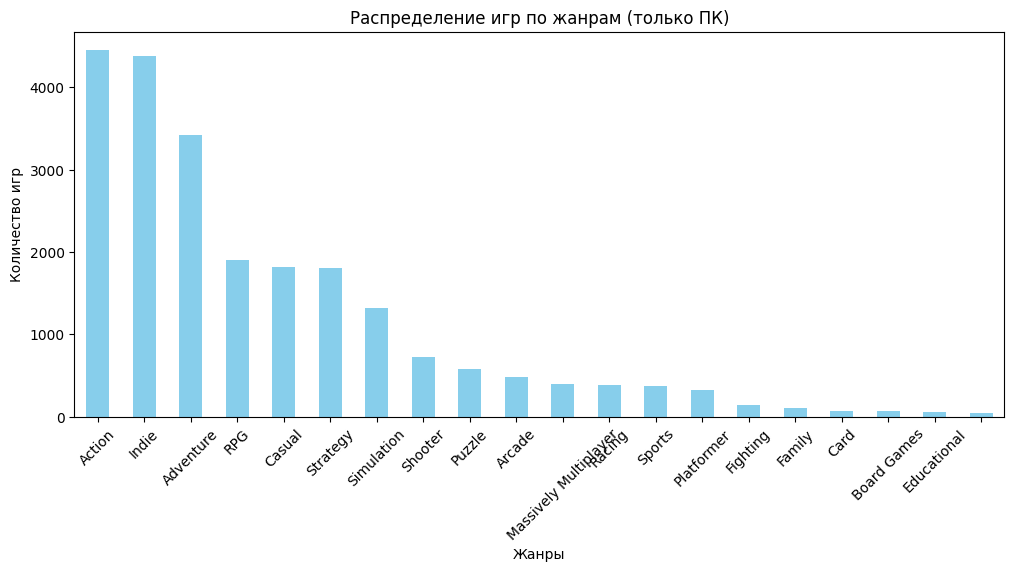

In [ ]:
import matplotlib.pyplot as plt

# –†–∞–∑–¥–µ–ª—è–µ–º –∂–∞–Ω—Ä—ã –∏ —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π DataFrame –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –ø–æ –∂–∞–Ω—Ä–∞–º
df_genres = df_ars.assign(genres=df['genres'].str.split(',')).explode('genres')
df_genres['genres'] = df_genres['genres'].str.strip()

# –ü–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –≤ –∫–∞–∂–¥–æ–º –∂–∞–Ω—Ä–µ
genre_counts = df_genres['genres'].value_counts()

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º
plt.figure(figsize=(12, 5))
genre_counts.plot(kind='bar', color='skyblue')
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∏–≥—Ä –ø–æ –∂–∞–Ω—Ä–∞–º (—Ç–æ–ª—å–∫–æ –ü–ö)")
plt.xlabel("–ñ–∞–Ω—Ä—ã")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä")
plt.xticks(rotation=45)
plt.show()

#Action –∏ Indie ‚Äì —Å–∞–º—ã–µ –∫–æ–Ω–∫—É—Ä–µ–Ω—Ç–Ω—ã–µ –∂–∞–Ω—Ä—ã, –≥–¥–µ —Å–ª–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å—Å—è.
#–ù–∏—à–µ–≤–∞—è —Å—Ç—Ä–∞—Ç–µ–≥–∏—è: Puzzle, Family, Board Games ‚Äì –∏—Ö –º–µ–Ω—å—à–µ, –Ω–æ –ø—Ä–∏ —Ö–æ—Ä–æ—à–µ–º –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–∂–Ω–æ –¥–æ–±–∏—Ç—å—Å—è —É—Å–ø–µ—Ö–∞.
#RPG –∏ Strategy ‚Äì —Å–∏–ª—å–Ω—ã–π –≤—ã–±–æ—Ä, –µ—Å–ª–∏ –≤–∞–∂–µ–Ω –±–∞–ª–∞–Ω—Å –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ –∏ –∫–∞—á–µ—Å—Ç–≤–∞.

<Figure size 1200x600 with 0 Axes>

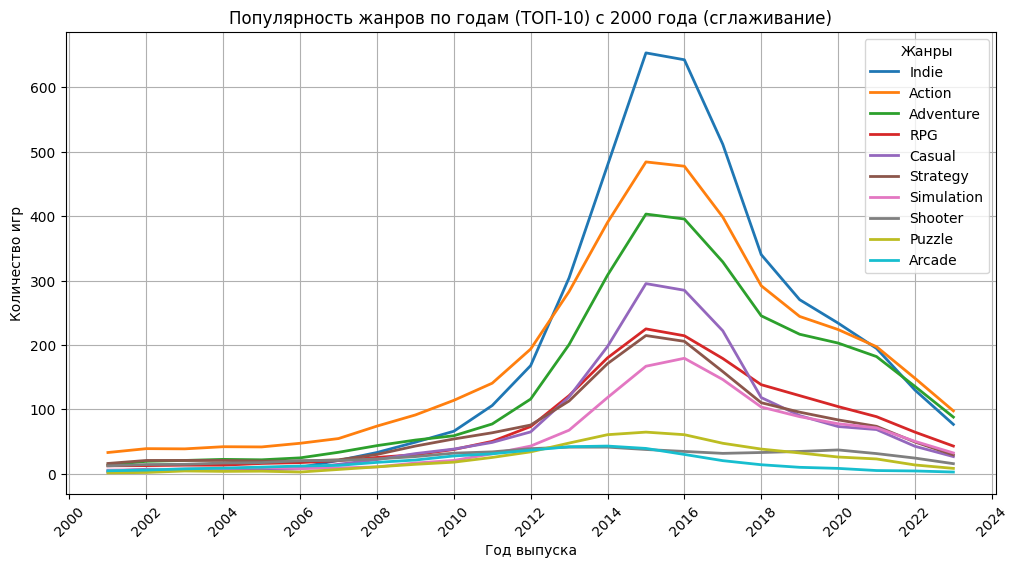

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# –†–∞–∑–¥–µ–ª—è–µ–º –∂–∞–Ω—Ä—ã –∏ —Å–æ–∑–¥–∞–µ–º –Ω–æ–≤—ã–π DataFrame –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –ø–æ –∂–∞–Ω—Ä–∞–º
df_genres = df_ars.assign(genres=df['genres'].str.split(',')).explode('genres')
df_genres['genres'] = df_genres['genres'].str.strip()

# –î–æ–±–∞–≤–ª—è–µ–º —Å—Ç–æ–ª–±–µ—Ü release_year –≤ df_genres
df_genres["release_year"] = df_ars["release_year"]

# –ü–æ–¥—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä –≤ –∫–∞–∂–¥–æ–º –∂–∞–Ω—Ä–µ –ø–æ –≥–æ–¥–∞–º
genre_trends = df_genres.groupby(["release_year", "genres"]).size().unstack(fill_value=0)

# –§–∏–ª—å—Ç—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, –Ω–∞—á–∏–Ω–∞—è —Å 2000 –≥–æ–¥–∞
genre_trends_filtered = genre_trends.loc[(genre_trends.index >= 2000) & (genre_trends.index < 2025)]

# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –¢–û–ü-10 —Å–∞–º—ã—Ö –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∂–∞–Ω—Ä–æ–≤ –ø–æ —Å—É–º–º–µ –≤—Å–µ—Ö –ª–µ—Ç
top_genres = genre_trends_filtered.sum().sort_values(ascending=False).head(10).index

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≥–æ–¥—ã –≤ —Ü–µ–ª—ã–µ —á–∏—Å–ª–∞ –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ–≥–æ –æ—Ç–æ–±—Ä–∞–∂–µ–Ω–∏—è
genre_trends_filtered.index = genre_trends_filtered.index.astype(int)

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∫–æ–ª—å–∑—è—â–µ–≥–æ —Å—Ä–µ–¥–Ω–µ–≥–æ (window=3)
genre_trends_smoothed = genre_trends_filtered.rolling(window=3, center=True).mean()

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∏–∑–º–µ–Ω–µ–Ω–∏–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç–∏ –∂–∞–Ω—Ä–æ–≤ —Å–æ —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ–º
plt.figure(figsize=(12, 6))
genre_trends_smoothed[top_genres].plot(figsize=(12, 6), linewidth=2)

plt.title("–ü–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∂–∞–Ω—Ä–æ–≤ –ø–æ –≥–æ–¥–∞–º (–¢–û–ü-10) —Å 2000 –≥–æ–¥–∞ (—Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ)")
plt.xlabel("–ì–æ–¥ –≤—ã–ø—É—Å–∫–∞")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä")
plt.legend(title="–ñ–∞–Ω—Ä—ã")

# –û–±–Ω–æ–≤–ª—è–µ–º —Ä–∞–∑–º–µ—Ç–∫—É –æ—Å–∏ X (—Ç–æ–ª—å–∫–æ —Ü–µ–ª—ã–µ —á–∏—Å–ª–∞ —Å —à–∞–≥–æ–º 2 –≥–æ–¥–∞)
plt.xticks(ticks=genre_trends_filtered.index[::2], labels=genre_trends_filtered.index[::2], rotation=45)

plt.grid(True)
plt.show()


#–ï—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ —Å–¥–µ–ª–∞—Ç—å –∏–≥—Ä—É –¥–ª—è —à–∏—Ä–æ–∫–æ–π –∞—É–¥–∏—Ç–æ—Ä–∏–∏, –≤—ã–±–∏—Ä–∞–π—Ç–µ Action –∏–ª–∏ RPG, –Ω–æ –¥–æ–±–∞–≤—å—Ç–µ —É–Ω–∏–∫–∞–ª—å–Ω—ã–π —ç–ª–µ–º–µ–Ω—Ç.
#–ï—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –∏–≥—Ä—É —Å –º–µ–Ω—å—à–µ–π –∫–æ–Ω–∫—É—Ä–µ–Ω—Ü–∏–µ–π, –ø–æ–¥—É–º–∞–π—Ç–µ –æ Strategy –∏–ª–∏ Simulation.
#–ï—Å–ª–∏ —Ö–æ—Ç–∏—Ç–µ –∏–Ω–¥–∏-–∏–≥—Ä—É, –≤–∞–º –Ω—É–∂–Ω–∞ —É–Ω–∏–∫–∞–ª—å–Ω–∞—è –∏–¥–µ—è ‚Äì —Ä—ã–Ω–æ–∫ –∏–Ω–¥–∏ –ø–µ—Ä–µ–≥—Ä—É–∂–µ–Ω.

<Figure size 1200x600 with 0 Axes>

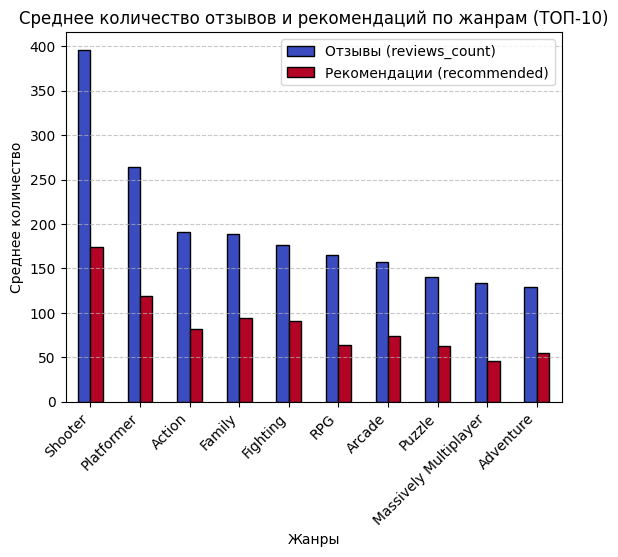

In [ ]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∂–∞–Ω—Ä–∞–º –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π
genre_reviews = df_genres.groupby("genres")[["reviews_count", "recommended"]].mean()

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(12, 6))
genre_reviews.sort_values("reviews_count", ascending=False).head(10).plot(kind="bar", colormap="coolwarm", edgecolor="black")
plt.title("–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –ø–æ –∂–∞–Ω—Ä–∞–º (–¢–û–ü-10)")
plt.xlabel("–ñ–∞–Ω—Ä—ã")
plt.ylabel("–°—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ")
plt.xticks(rotation=45, ha="right")
plt.legend(["–û—Ç–∑—ã–≤—ã (reviews_count)", "–†–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ (recommended)"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<Figure size 1200x600 with 0 Axes>

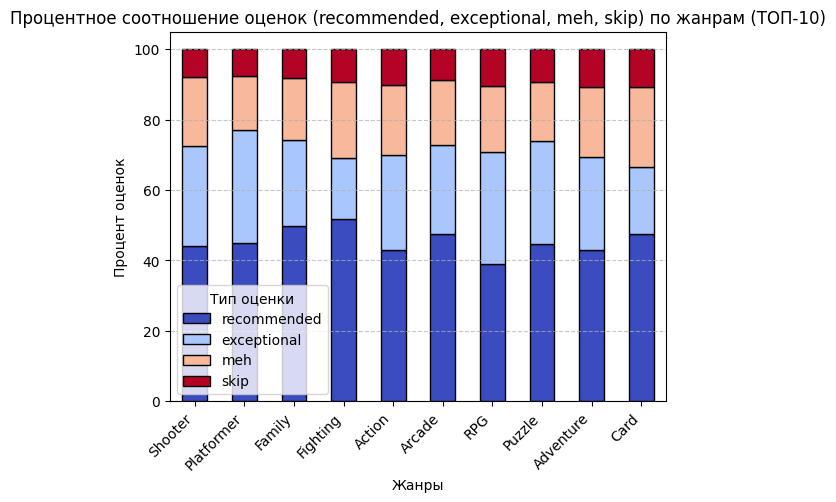

In [ ]:
# –ì—Ä—É–ø–ø–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ –ø–æ –∂–∞–Ω—Ä–∞–º –∏ —Å—á–∏—Ç–∞–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ü–µ–Ω–æ–∫ –∫–∞–∂–¥–æ–≥–æ —Ç–∏–ø–∞
genre_ratings = df_genres.groupby("genres")[["recommended", "exceptional", "meh", "skip"]].mean()

# –ù–æ—Ä–º–∏—Ä—É–µ–º –¥–∞–Ω–Ω—ã–µ, —á—Ç–æ–±—ã –ø–æ–ª—É—á–∏—Ç—å –ø—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ (–∫–∞–∂–¥–∞—è –∫–æ–ª–æ–Ω–∫–∞ / —Å—É–º–º–∞)
genre_ratings_percentage = genre_ratings.div(genre_ratings.sum(axis=1), axis=0) * 100

# –í—ã–±–∏—Ä–∞–µ–º –¢–û–ü-10 –∂–∞–Ω—Ä–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–∏–º —á–∏—Å–ª–æ–º —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π
top_genres = genre_ratings["recommended"].sort_values(ascending=False).head(10).index

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Ç–∑—ã–≤–æ–≤ –≤ –ø—Ä–æ—Ü–µ–Ω—Ç–∞—Ö
plt.figure(figsize=(12, 6))
genre_ratings_percentage.loc[top_genres].plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black")

plt.title("–ü—Ä–æ—Ü–µ–Ω—Ç–Ω–æ–µ —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫ (recommended, exceptional, meh, skip) –ø–æ –∂–∞–Ω—Ä–∞–º (–¢–û–ü-10)")
plt.xlabel("–ñ–∞–Ω—Ä—ã")
plt.ylabel("–ü—Ä–æ—Ü–µ–Ω—Ç –æ—Ü–µ–Ω–æ–∫")
plt.xticks(rotation=45, ha="right")
plt.legend(title="–¢–∏–ø –æ—Ü–µ–Ω–∫–∏")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


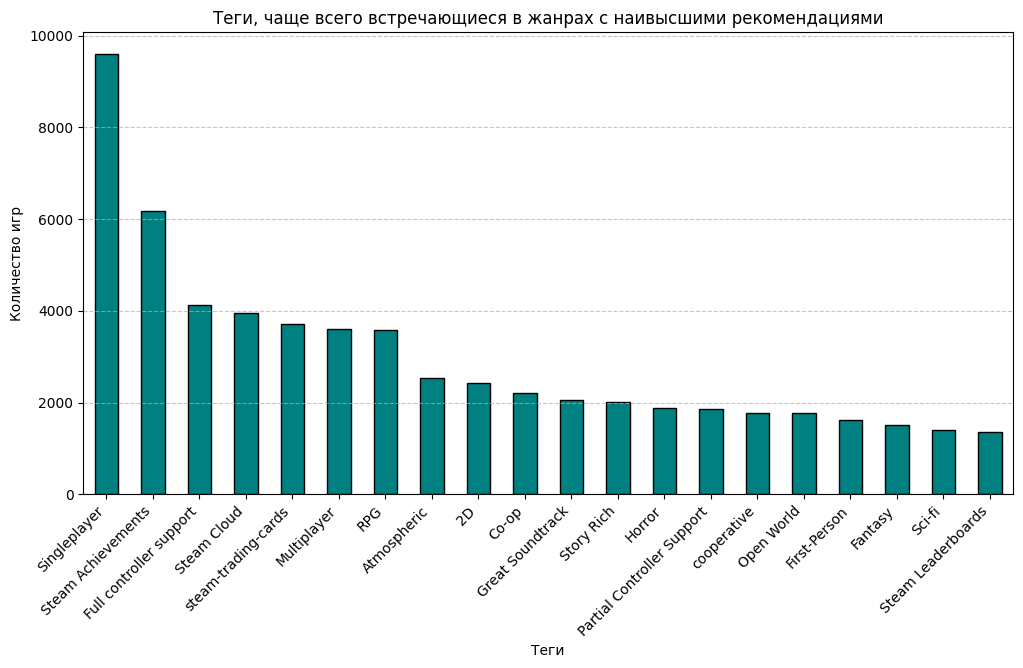

In [ ]:
top_recommended_genres = df_genres.groupby("genres")["recommended"].mean().sort_values(ascending=False).head(10).index

# –û—Ç–±–∏—Ä–∞–µ–º —Ç–æ–ª—å–∫–æ –∏–≥—Ä—ã –∏–∑ —ç—Ç–∏—Ö –∂–∞–Ω—Ä–æ–≤
df_top_recommended = df_genres[df_genres["genres"].isin(top_recommended_genres)]

# –†–∞–∑–¥–µ–ª—è–µ–º —Ç–µ–≥–∏ –Ω–∞ –æ—Ç–¥–µ–ª—å–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏ –∏ —Å—á–∏—Ç–∞–µ–º —á–∞—Å—Ç–æ—Ç—É
df_tags = df_top_recommended.assign(tags=df_top_recommended["tags"].str.split(",")).explode("tags")
df_tags["tags"] = df_tags["tags"].str.strip()

# –ü–æ–¥—Å—á–∏—Ç—ã–≤–∞–µ–º –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ç–µ–≥–∏
tag_counts = df_tags["tags"].value_counts().head(20)

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
plt.figure(figsize=(12, 6))
tag_counts.plot(kind="bar", color="teal", edgecolor="black")
plt.title("–¢–µ–≥–∏, —á–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏–µ—Å—è –≤ –∂–∞–Ω—Ä–∞—Ö —Å –Ω–∞–∏–≤—ã—Å—à–∏–º–∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏—è–º–∏")
plt.xlabel("–¢–µ–≥–∏")
plt.ylabel("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∏–≥—Ä")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

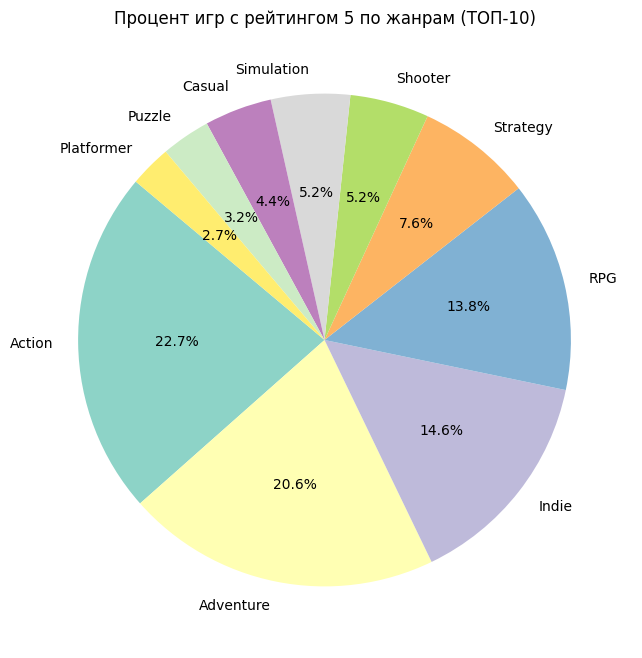

In [ ]:
# –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ø—Ä–æ—Ü–µ–Ω—Ç –∏–≥—Ä —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 5 –ø–æ –∂–∞–Ω—Ä–∞–º
top_rated_genres = df_genres[df_genres["rating_top"] == 5]["genres"].value_counts(normalize=True).head(10)

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º
plt.figure(figsize=(8, 8))
top_rated_genres.plot(kind="pie", autopct="%1.1f%%", startangle=140, colormap="Set3")
plt.title("–ü—Ä–æ—Ü–µ–Ω—Ç –∏–≥—Ä —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 5 –ø–æ –∂–∞–Ω—Ä–∞–º (–¢–û–ü-10)")
plt.ylabel("")
plt.show()
